# Analysis of the real estate market

In this study, we will analyze ads for the sale of apartments in St. Petersburg and neighboring settlements over several years. The task is to establish parameters for determining the market price of an apartment and for further building an automated system for tracking anomalies and fraud.

1. [Overview](#overview)
2. [Preprocessing](#preprocessing)
3. [Change Data Type](#types) 
4. [Numeric Data Optimization](#int/float)
5.[Processing Object Types](#object)
6. [Add Additional Columns](#add.columns)
7. [Research Data Analysis](#analysis)


In [235]:
!pip install geopy

from geopy.geocoders import Nominatim

import math
import pandas as pd
import datetime as dt

import warnings

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'


pd.set_option('display.float_format', '{:,.2f}'.format)

## 1. Overview<a id="overview"></a>

In [236]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [237]:
df.head()

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70         16.00        51.00      8          NaN  ...   
1             nan         11.00        18.60      1          NaN  ...   
2             nan          5.00        34.30      4          NaN  ...   
3             nan         14.00          nan      9          NaN  ...   
4            3.03         14.00        32.00     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0         25.00      nan  Санкт-Петербург         18,863.00   
1         11.00     2.00   посёлок Шушары         12,817.00   
2          8.30     0.00  Санкт-Петербург         21,741.00   
3           nan     0.00  Санкт-Петербург         28,098.00   
4         41.00      nan  Санкт-Петербург         31,856.00   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0           16,028.00              1.00         482.00              2.00   
1           18,603.00              0.00            nan              0.00   
2           13,933.00              1.00          90.00              2.00   
3            6,800.00              2.00          84.00              3.00   
4            8,098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              nan  
1            nan            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00  

[5 rows x 22 columns]

In [238]:
df.describe().T

count         mean           std       min  \
total_images        23,699.00         9.86          5.68      0.00   
last_price          23,699.00 6,541,548.77 10,887,013.27 12,190.00   
total_area          23,699.00        60.35         35.65     12.00   
rooms               23,699.00         2.07          1.08      0.00   
ceiling_height      14,504.00         2.77          1.26      1.00   
floors_total        23,613.00        10.67          6.60      1.00   
living_area         21,796.00        34.46         22.03      2.00   
floor               23,699.00         5.89          4.89      1.00   
kitchen_area        21,421.00        10.57          5.91      1.30   
balcony             12,180.00         1.15          1.07      0.00   
airports_nearest    18,157.00    28,793.67     12,630.88      0.00   
cityCenters_nearest 18,180.00    14,191.28      8,608.39    181.00   
parks_around3000    18,181.00         0.61          0.80      0.00   
parks_nearest        8,079.00       490.80        342.32      1.00   
ponds_around3000    18,181.00         0.77          0.94      0.00   
ponds_nearest        9,110.00       517.98        277.72     13.00   
days_exposition     20,518.00       180.89        219.73      1.00   

                             25%          50%          75%            max  
total_images                6.00         9.00        14.00          50.00  
last_price          3,400,000.00 4,650,000.00 6,800,000.00 763,000,000.00  
total_area                 40.00        52.00        69.90         900.00  
rooms                       1.00         2.00         3.00          19.00  
ceiling_height              2.52         2.65         2.80         100.00  
floors_total                5.00         9.00        16.00          60.00  
living_area                18.60        30.00        42.30         409.70  
floor                       2.00         4.00         8.00          33.00  
kitchen_area                7.00         9.10        12.00         112.00  
balcony                     0.00         1.00         2.00           5.00  
airports_nearest       18,585.00    26,726.00    37,273.00      84,869.00  
cityCenters_nearest     9,238.00    13,098.50    16,293.00      65,968.00  
parks_around3000            0.00         0.00         1.00           3.00  
parks_nearest             288.00       455.00       612.00       3,190.00  
ponds_around3000            0.00         1.00         1.00           3.00  
ponds_nearest             294.00       502.00       729.00       1,344.00  
days_exposition            45.00        95.00       232.00       1,580.00

In [239]:
df.tail()

total_images    last_price  total_area first_day_exposition  rooms  \
23694             9  9,700,000.00      133.81  2017-03-21T00:00:00      3   
23695            14  3,100,000.00       59.00  2018-01-15T00:00:00      3   
23696            18  2,500,000.00       56.70  2018-02-11T00:00:00      2   
23697            13 11,475,000.00       76.75  2017-03-28T00:00:00      2   
23698             4  1,350,000.00       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
23694            3.70          5.00        73.30      3          NaN  ...   
23695             nan          5.00        38.00      4          NaN  ...   
23696             nan          3.00        29.70      1          NaN  ...   
23697            3.00         17.00          nan     12          NaN  ...   
23698            2.50          5.00        12.30      1          NaN  ...   

       kitchen_area  balcony        locality_name  airports_nearest  \
23694         13.83      nan      Санкт-Петербург         24,665.00   
23695          8.50      nan                Тосно               nan   
23696           nan      nan     село Рождествено               nan   
23697         23.30     2.00      Санкт-Петербург         39,140.00   
23698          9.00      nan  поселок Новый Учхоз               nan   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
23694            4,232.00              1.00         796.00              3.00   
23695                 nan               nan            nan               nan   
23696                 nan               nan            nan               nan   
23697           10,364.00              2.00         173.00              3.00   
23698                 nan               nan            nan               nan   

       ponds_nearest  days_exposition  
23694         381.00              nan  
23695            nan            45.00  
23696            nan              nan  
23697         196.00           602.00  
23698            nan              nan  

[5 rows x 22 columns]

In [240]:
df.sample()

total_images   last_price  total_area first_day_exposition  rooms  \
2939             7 6,550,000.00       64.30  2018-01-12T00:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
2939            3.75          7.00        48.80      3          NaN  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
2939          6.00      nan  Санкт-Петербург         21,399.00   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2939            2,009.00              2.00         320.00              1.00   

      ponds_nearest  days_exposition  
2939         293.00            98.00  

[1 rows x 22 columns]

## 2. Preprocessing <a id="preprocessing"></a>

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's analyse all the missing values

In [242]:
def na_describe(df):
    na_df = pd.concat([df.isna().sum(), df.isna().sum()/len(df)*100], axis=1)
    na_df.columns = ["count", "% missing"]
    na_df = na_df[na_df["count"] > 0]
    na_df = na_df.sort_values(by="% missing", ascending=False)
    return na_df

In [243]:
display(na_describe(df))

count  % missing
is_apartment         20924      88.29
parks_nearest        15620      65.91
ponds_nearest        14589      61.56
balcony              11519      48.61
ceiling_height        9195      38.80
airports_nearest      5542      23.38
cityCenters_nearest   5519      23.29
parks_around3000      5518      23.28
ponds_around3000      5518      23.28
days_exposition       3181      13.42
kitchen_area          2278       9.61
living_area           1903       8.03
floors_total            86       0.36
locality_name           49       0.21

Nearly 40% of missing data is in the'ceiling _ height'column. Perhaps the owners did not have information about the height of the ceilings and therefore it is not available. Let's look at the data we have in this column

In [244]:
df.ceiling_height.describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

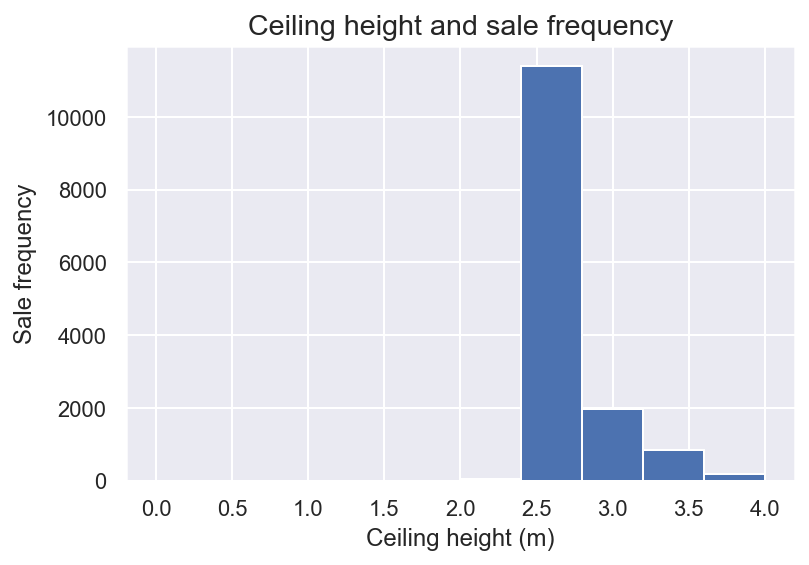

In [245]:
df.ceiling_height.hist(bins=10, range=(0,4));
plt.title('Ceiling height and sale frequency', size='large');
plt.xlabel('Ceiling height (m)');
plt.ylabel('Sale frequency');

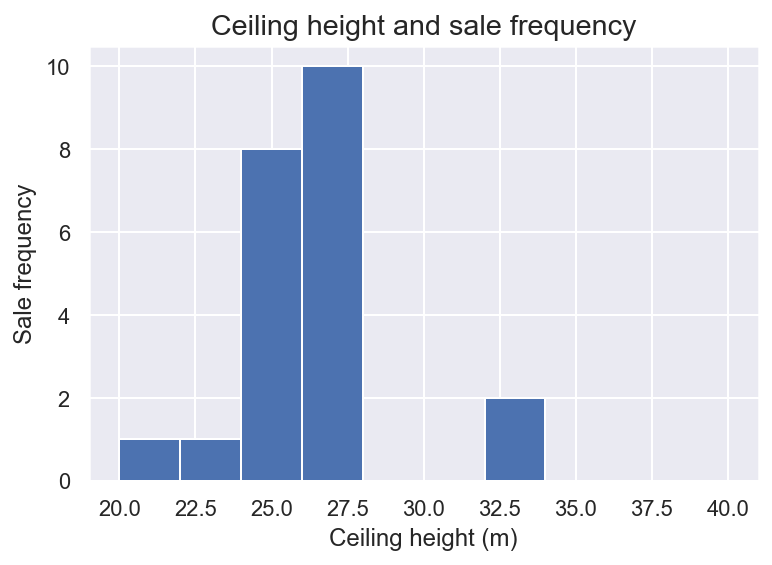

In [246]:
df.ceiling_height.hist(bins=10, range=(20,40));
plt.title('Ceiling height and sale frequency', size='large');
plt.xlabel('Ceiling height (m)');
plt.ylabel('Sale frequency');


The height of the ceilings of 25 meters seems erroneous, most likely someone forgot to write a comma

In [247]:
df[df['ceiling_height']>5].head(10)

total_images     last_price  total_area first_day_exposition  rooms  \
355             17   3,600,000.00       55.20  2018-07-12T00:00:00      2   
464             15  66,571,000.00      280.30  2015-06-11T00:00:00      6   
1026            20 155,000,000.00      310.00  2018-10-12T00:00:00      5   
1388            20  59,800,000.00      399.00  2015-01-21T00:00:00      5   
3148            14   2,900,000.00       75.00  2018-11-12T00:00:00      3   
3474             3   1,400,000.00       30.00  2018-03-16T00:00:00      1   
4643             0   4,300,000.00       45.00  2018-02-01T00:00:00      2   
4876             7   3,000,000.00       25.00  2017-09-27T00:00:00      0   
5076             0   3,850,000.00       30.50  2018-10-03T00:00:00      1   
5246             0   2,500,000.00       54.00  2017-10-13T00:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
355            25.00          5.00        32.00      2        False  ...   
464             5.20          8.00       159.50      7          NaN  ...   
1026            5.30          3.00       190.00      3          NaN  ...   
1388            5.60          6.00          nan      6          NaN  ...   
3148           32.00          3.00        53.00      2          NaN  ...   
3474            8.00          5.00        15.30      2        False  ...   
4643           25.00          9.00        30.00      2          NaN  ...   
4876           27.00         25.00        17.00     17          NaN  ...   
5076           24.00          5.00        19.50      1         True  ...   
5246           27.00          5.00        30.00      3          NaN  ...   

      kitchen_area  balcony    locality_name  airports_nearest  \
355            nan     2.00          Гатчина               nan   
464          21.10     0.00  Санкт-Петербург         26,316.00   
1026         63.00     2.00  Санкт-Петербург         24,899.00   
1388           nan     0.00  Санкт-Петербург         26,204.00   
3148          8.00      nan           Волхов               nan   
3474          7.30      nan    деревня Нурма               nan   
4643          7.00     1.00  Санкт-Петербург         12,016.00   
4876           nan     2.00   посёлок Мурино               nan   
5076          5.50      nan  Санкт-Петербург         29,686.00   
5246          9.00     2.00     деревня Мины               nan   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
355                  nan               nan            nan               nan   
464             6,655.00              3.00         187.00              1.00   
1026            4,785.00              0.00            nan              1.00   
1388            6,934.00              2.00         149.00              2.00   
3148                 nan               nan            nan               nan   
3474                 nan               nan            nan               nan   
4643           13,256.00              1.00         658.00              1.00   
4876                 nan               nan            nan               nan   
5076            8,389.00              3.00         397.00              1.00   
5246                 nan               nan            nan               nan   

      ponds_nearest  days_exposition  
355             nan           259.00  
464          616.00           578.00  
1026         603.00              nan  
1388         577.00           719.00  
3148            nan              nan  
3474            nan           125.00  
4643         331.00           181.00  
4876            nan            28.00  
5076         578.00             7.00  
5246            nan           540.00  

[10 rows x 22 columns]

The height of the ceilings can be more than 5 meters. But even for elite houses, this is very rare.

In [248]:
df[df['last_price']> 150000000].sort_values('ceiling_height', ascending=False).head(5)

total_images     last_price  total_area first_day_exposition  rooms  \
1026             20 155,000,000.00      310.00  2018-10-12T00:00:00      5   
19865            20 180,000,000.00      347.00  2015-01-21T00:00:00      8   
2536             16 159,984,000.00      242.40  2015-08-27T00:00:00      4   
1436             19 330,000,000.00      190.00  2018-04-04T00:00:00      3   
13749             7 240,000,000.00      410.00  2017-04-01T00:00:00      6   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1026             5.30          3.00       190.00      3          NaN  ...   
19865            3.90          6.00       260.00      3          NaN  ...   
2536             3.85          9.00       131.00      7          NaN  ...   
1436             3.50          7.00        95.00      5          NaN  ...   
13749            3.40          7.00       218.00      7          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
1026          63.00     2.00  Санкт-Петербург         24,899.00   
19865         45.00     0.00  Санкт-Петербург         23,962.00   
2536          20.00     0.00  Санкт-Петербург         21,946.00   
1436          40.00      nan  Санкт-Петербург         23,011.00   
13749         40.00     0.00  Санкт-Петербург         32,440.00   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1026             4,785.00              0.00            nan              1.00   
19865            3,794.00              2.00         537.00              3.00   
2536             2,242.00              1.00         679.00              1.00   
1436             1,197.00              3.00         519.00              3.00   
13749            5,297.00              0.00            nan              2.00   

       ponds_nearest  days_exposition  
1026          603.00              nan  
19865         501.00           834.00  
2536          227.00           501.00  
1436          285.00           233.00  
13749         198.00           199.00  

[5 rows x 22 columns]

It is reasonable to believe that there are no above ceilings and that all our data where the ceiling height is more than 5.5 meters is just mistakes. Maybe just typos. We divide the prices into several categories and, in accordance with them, fill in the data on the height of the ceilings.

In [249]:
df.last_price.describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [250]:
def price_cat(row):
    if row < 4650000:
        return 'low'
    elif 4650000 <= row < 6800000:
        return 'medium'
    return 'high'
    
df['price_cat'] = df.last_price.apply(price_cat)
df.groupby('price_cat')['ceiling_height'].agg(['count', 'mean', 'median']).sort_values('mean')

count  mean  median
price_cat                     
low         6716  2.67    2.55
medium      3845  2.72    2.65
high        3943  3.00    2.90

First, we see that at the height of the ceilings and the price of apartments there is linear relation. For the apartments with a price of 465 thousand and more ceilings are higher than apartments with a price of up to 465. And the most expensive ones have the highest ceilings.

In [251]:
ceiling_median = df.groupby('price_cat').agg({'ceiling_height': 'median'}).sort_values('ceiling_height').reset_index()
ceiling_median

price_cat  ceiling_height
0       low            2.55
1    medium            2.65
2      high            2.90

In [252]:
ceiling_map_dict = {row['price_cat']: row['ceiling_height'] for index, row in ceiling_median.iterrows()}
df['ceiling_height'] = df['ceiling_height'].fillna(df['price_cat'].map(ceiling_map_dict))


In [253]:
df.ceiling_height.describe()

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.55
50%          2.60
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [254]:
df.ceiling_height.sort_values(ascending=False).head()

22869   100.00
22336    32.00
3148     32.00
21377    27.50
4876     27.00
Name: ceiling_height, dtype: float64

In [255]:
df.loc[df['ceiling_height'] > 5.5, 'ceiling_height'] = df['ceiling_height'].mean()

In [256]:
df.ceiling_height.describe()

count   23,699.00
mean         2.70
std          0.24
min          1.00
25%          2.55
50%          2.60
75%          2.80
max          5.50
Name: ceiling_height, dtype: float64

In [257]:
df.ceiling_height.isna().sum()

0

In [258]:
df.living_area.describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [259]:
df.living_area.isna().mean()

0.08029874678256467

In [260]:
df[df['living_area'].isna()].head(10)

total_images    last_price  total_area first_day_exposition  rooms  \
3               0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
7               5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
30             12  2,200,000.00       32.80  2018-02-19T00:00:00      1   
37             10  1,990,000.00       45.80  2017-10-28T00:00:00      2   
44             13  5,350,000.00       40.00  2018-11-18T00:00:00      1   
59             15  6,300,000.00       46.50  2017-03-06T00:00:00      1   
60              3  2,740,000.00       35.00  2018-01-01T00:00:00      1   
81              9 10,949,000.00       68.00  2018-12-27T00:00:00      1   
82              3  4,500,000.00       80.50  2018-01-15T00:00:00      3   
116            18 10,999,000.00       97.20  2017-11-13T00:00:00      3   

     ceiling_height  floors_total  living_area  floor is_apartment  ...  \
3              2.90         14.00          nan      9          NaN  ...   
7              2.90         24.00          nan     22          NaN  ...   
30             2.55          9.00          nan      2          NaN  ...   
37             2.50          5.00          nan      1          NaN  ...   
44             2.65         22.00          nan      3          NaN  ...   
59             2.65         13.00          nan     13          NaN  ...   
60             2.55         12.00          nan      8          NaN  ...   
81             2.90         10.00          nan      6          NaN  ...   
82             2.55         25.00          nan     16          NaN  ...   
116            2.50         16.00          nan     16          NaN  ...   

     balcony                        locality_name  airports_nearest  \
3       0.00                      Санкт-Петербург         28,098.00   
7       2.00                      Санкт-Петербург         23,982.00   
30       nan                             Коммунар               nan   
37       nan  поселок городского типа Красный Бор               nan   
44      1.00                      Санкт-Петербург         30,471.00   
59       nan                      Санкт-Петербург         11,125.00   
60       nan                       посёлок Мурино               nan   
81       nan                      Санкт-Петербург               nan   
82       nan                       посёлок Шушары         12,430.00   
116     5.00                      Санкт-Петербург         19,426.00   

     cityCenters_nearest parks_around3000  parks_nearest  ponds_around3000  \
3               6,800.00             2.00          84.00              3.00   
7              11,634.00             0.00            nan              0.00   
30                   nan              nan            nan               nan   
37                   nan              nan            nan               nan   
44             11,603.00             1.00         620.00              1.00   
59             14,501.00             0.00            nan              0.00   
60                   nan              nan            nan               nan   
81                   nan              nan            nan               nan   
82             18,217.00             0.00            nan              0.00   
116            21,138.00             0.00            nan              2.00   

     ponds_nearest  days_exposition  price_cat  
3           234.00           424.00       high  
7              nan              nan       high  
30             nan            63.00        low  
37             nan           196.00        low  
44        1,152.00              nan     medium  
59             nan           336.00     medium  
60             nan            11.00        low  
81             nan              nan       high  
82             nan            60.00        low  
116         390.00           394.00       high  

[10 rows x 23 columns]

In [261]:
df.groupby('total_area')['living_area'].agg(['count', 'mean', 'median'])

count   mean  median
total_area                      
12.00           1  10.00   10.00
13.00           1  10.00   10.00
13.20           0    nan     nan
14.00           1  11.00   11.00
15.00           0    nan     nan
...           ...    ...     ...
590.00          1 409.00  409.00
618.00          1 258.00  258.00
631.00          0    nan     nan
631.20          1 322.30  322.30
900.00          1 409.70  409.70

[2182 rows x 3 columns]

In [262]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_cat'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [264]:
df['total_living_coeff'] = df.living_area / df.total_area

In [265]:
df['total_living_coeff'].describe()

count   21,796.00
mean         0.56
std          0.11
min          0.02
25%          0.50
50%          0.57
75%          0.64
max          1.00
Name: total_living_coeff, dtype: float64

In [266]:
price_living_coeff = df.groupby('price_cat').agg({'total_living_coeff': 'mean'}).reset_index()
price_living_coeff 

price_cat  total_living_coeff
0      high                0.57
1       low                0.56
2    medium                0.57

It can be seen that the ratio of residential_area/total_area of apartments differs very little depending on the price. We can fill in the missing residential area data simply by multiplying the total area by the coefficient we found we found.

In [267]:
map_dict = {row['price_cat']: row['total_living_coeff'] for index, row in price_living_coeff.iterrows()}
df['living_area'] = df.living_area.fillna(df['price_cat'].map(map_dict))
df.living_area.isna().mean()

0.0

In [268]:
df.living_area.describe()

count   23,699.00
mean        31.74
std         23.05
min          0.56
25%         17.80
50%         29.00
75%         41.10
max        409.70
Name: living_area, dtype: float64

Let's check the 'is_apartment' col 

In [269]:
df.is_apartment.unique()

array([nan, False, True], dtype=object)

In [270]:
df.groupby('is_apartment')['total_area'].agg(['count', 'mean', 'median'])

count  mean  median
is_apartment                     
False          2725 61.12   54.00
True             50 83.33   64.00

It is very difficult to draw any conclusions on this parameter. We have too few values - only 50 apartments of the "apartments" type and the data is not representative.
We'll delete this column so that it does not interfere with our further analysis

In [271]:
df.drop('is_apartment', inplace=True, axis=1)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          21421 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  cityCenters_nearest

In [273]:
df['total_living_coeff'] = df['living_area'] / df['total_area']

In [274]:
df.floors_total.isna().mean()

0.0036288450989493226

In [275]:
df.floors_total.describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [276]:
df.floors_total.sort_values(ascending=False).head(10)

2253    60.00
16731   52.00
16934   37.00
397     36.00
5807    36.00
11079   36.00
5749    35.00
20938   35.00
871     35.00
13975   35.00
Name: floors_total, dtype: float64

In [277]:
df[df['floors_total'] > 35].sort_values(by='floors_total', ascending=False)

total_images   last_price  total_area first_day_exposition  rooms  \
2253             12 3,800,000.00       45.50  2018-06-28T00:00:00      2   
16731             9 3,978,000.00       40.00  2018-09-24T00:00:00      1   
16934             5 4,100,000.00       40.00  2017-10-17T00:00:00      1   
397              15 5,990,000.00       54.00  2018-03-22T00:00:00      2   
5807             17 8,150,000.00       80.00  2019-01-09T00:00:00      2   
11079            16 9,200,000.00       75.00  2019-02-22T00:00:00      2   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
2253             2.88         60.00        27.40      4   False  ...   
16731            2.65         52.00        10.50     18   False  ...   
16934            1.75         37.00        17.40      5   False  ...   
397              2.65         36.00        21.40     28   False  ...   
5807             2.72         36.00        41.00     13   False  ...   
11079            2.70         36.00        40.00     29   False  ...   

         locality_name  airports_nearest  cityCenters_nearest  \
2253         Кронштадт         67,763.00            49,488.00   
16731  Санкт-Петербург         20,728.00            12,978.00   
16934  Санкт-Петербург         18,732.00            20,444.00   
397    Санкт-Петербург         18,732.00            20,444.00   
5807   Санкт-Петербург         18,732.00            20,444.00   
11079  Санкт-Петербург         18,732.00            20,444.00   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
2253              2.00         342.00              3.00         614.00   
16731             1.00         793.00              0.00            nan   
16934             0.00            nan              3.00          80.00   
397               0.00            nan              3.00          80.00   
5807              0.00            nan              3.00          80.00   
11079             0.00            nan              3.00          80.00   

       days_exposition  price_cat  total_living_coeff  
2253            166.00        low                0.60  
16731            45.00        low                0.26  
16934            71.00        low                0.43  
397              11.00     medium                0.40  
5807             38.00       high                0.51  
11079              nan       high                0.53  

[6 rows x 23 columns]

В Кронштадте нет зданий в 60 этажей (загуглил) поэтому скорее всего это ошибка и этажей на самом деле 6. А что насчет значения 52 , 37 и 36?

There are also no 52-story buildings in St. Petersburg, but there are buildings with 37 floors. "Prince Alexander Nevsky" residency was the tallest building in St. Petersburg until 2013 and in the announcement of an apartment from it. And according to the geolocation, it is clear that the apartments in the 37-story building are in the same building. 36 and 37 floors are indicated in the data and since people most likely did not know exactly how many floors 36 or 37 were in the building. This error will not affect our sample, but still we will change 36 to 37 (data from Google)

In [278]:
df.loc[df['floors_total'] == 36, 'floors_total'] = 37
df.loc[df['floors_total'] == 60, 'floors_total'] = 6

In [279]:
df[(df['airports_nearest'] == 20728.00) & (df['cityCenters_nearest'] == 12978.00)]

total_images   last_price  total_area first_day_exposition  rooms  \
16731             9 3,978,000.00       40.00  2018-09-24T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  studio  ...  \
16731            2.65         52.00        10.50     18   False  ...   

         locality_name  airports_nearest  cityCenters_nearest  \
16731  Санкт-Петербург         20,728.00            12,978.00   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
16731             1.00         793.00              0.00            nan   

       days_exposition  price_cat  total_living_coeff  
16731            45.00        low                0.26  

[1 rows x 23 columns]

It is rather strange that there are no more announcements from this building, and there is no information about the building in 52 floors either. Let's just delete this row and continue the analysis

In [280]:
df.drop(axis=0, index=16731, inplace=True)

In [281]:
locality_floors = df.groupby('locality_name').agg({'floors_total': 'mean', 'floor':'max'}).reset_index()
locality_floors.head()

locality_name  floors_total  floor
0  Бокситогорск          4.19      5
1      Волосово          4.56      5
2        Волхов          4.86      7
3    Всеволожск          8.39     20
4        Выборг          5.87     10

In [282]:
locality_floors["floors_total"] = locality_floors["floors_total"].astype('int')

floor_map = {row["locality_name"]: max(row["floors_total"], row["floor"]) for i, row in locality_floors.iterrows()}

df['floors_total'] = df['floors_total'].fillna(df["locality_name"].map(floor_map))


In [283]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df[df['floors_total'].isna()]['floor']

We replaced the empty values in the column'floors_total'with the average'floors_total' and the highest'floors' in the area where our announcement appeared. In rows where 'locality_name' is not specified, we filled the number of floors by the value specified in column 'floor'

In [284]:
df.kitchen_area.describe()

count   21,420.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [285]:
df.kitchen_area.isna().mean()

0.09612625538020086

In [286]:
df.groupby('price_cat')['kitchen_area'].agg(['count', 'mean', 'median'])

count  mean  median
price_cat                     
high        5436 15.52   13.10
low        10484  8.30    8.00
medium      5500 10.01    9.60

In [287]:
df.total_area.describe()

count   23,698.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

In [288]:
def area_cat(area):
    if area <= 40:
        return 'small'
    elif 40 < area  <=50:
        return 'medium'
    elif 50 < area <=70:
        return 'large'
    return 'XL'
     
df['size_category'] = df.total_area.apply(area_cat)
kitchen_sizes = df.groupby('size_category').agg({'kitchen_area': 'median'}).reset_index()
kitchen_sizes

size_category  kitchen_area
0            XL         13.00
1         large          9.00
2        medium          7.90
3         small          8.25

In [289]:
map_kitchen_size = {row['size_category']: row['kitchen_area'] for index, row in kitchen_sizes.iterrows()}
df['kitchen_area'] = df['kitchen_area'].fillna(df['size_category'].map(map_kitchen_size))

In [290]:
df.kitchen_area.isna().mean()

0.0

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  int64  
 9   studio                23698 non-null  bool   
 10  open_plan             23698 non-null  bool   
 11  kitchen_area          23698 non-null  float64
 12  balcony               12180 non-null  float64
 13  locality_name         23649 non-null  object 
 14  airports_nearest      18156 non-null  float64
 15  cityCenters_nearest

In [292]:
df['balcony'] = df['balcony'].fillna(0)

In [293]:
df.balcony.isna().sum()

0

In [294]:
df[df['locality_name'].isna()].groupby('price_cat').agg({'airports_nearest': 'mean', 'cityCenters_nearest': 'mean'})

airports_nearest  cityCenters_nearest
price_cat                                       
high              25,380.50             7,956.75
low               23,561.93            15,341.07
medium            24,682.82            10,941.09

In [295]:
df[(df['airports_nearest'] < 26000)&
   (df['airports_nearest'] > 22000)&
   (df['cityCenters_nearest'] > 7000)&
   (df['cityCenters_nearest'] < 15000)]['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

At this distance from the center and from the airport, locality_name usually is St. Petersburg. Let's fill in the empty values in the 'locality _ name' column

In [296]:
df.locality_name = df.locality_name.fillna('Санкт-Петербург')

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  int64  
 9   studio                23698 non-null  bool   
 10  open_plan             23698 non-null  bool   
 11  kitchen_area          23698 non-null  float64
 12  balcony               23698 non-null  float64
 13  locality_name         23698 non-null  object 
 14  airports_nearest      18156 non-null  float64
 15  cityCenters_nearest

In [298]:
df.days_exposition.describe()

count   20,517.00
mean       180.90
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [299]:
size_days_exposed = df.groupby('size_category').agg({'days_exposition': 'median'}).sort_values('days_exposition').reset_index()
size_days_exposed

size_category  days_exposition
0         small            74.00
1        medium            87.00
2         large            96.00
3            XL           138.00

Rate of selling (how fast) depends on the size of the appartment

In [300]:
df.groupby('price_cat').agg({'days_exposition': 'median'}).sort_values('days_exposition').reset_index()

price_cat  days_exposition
0       low            84.00
1    medium            95.00
2      high           127.00

And of course - the price also influences the speed

In [301]:
map_days_exposed = {row['size_category']: row['days_exposition'] for index, row in size_days_exposed.iterrows()}
df['days_exposition'] = df['days_exposition'].fillna(df['size_category'].map(map_days_exposed))
df.days_exposition.isna().sum()

0

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  int64  
 9   studio                23698 non-null  bool   
 10  open_plan             23698 non-null  bool   
 11  kitchen_area          23698 non-null  float64
 12  balcony               23698 non-null  float64
 13  locality_name         23698 non-null  object 
 14  airports_nearest      18156 non-null  float64
 15  cityCenters_nearest

In [303]:
df.groupby('price_cat')['airports_nearest'].mean()

price_cat
high     28,013.21
low      29,223.68
medium   29,074.13
Name: airports_nearest, dtype: float64

In [304]:
df.groupby('price_cat')['cityCenters_nearest'].mean()

price_cat
high      9,906.50
low      17,708.93
medium   14,226.02
Name: cityCenters_nearest, dtype: float64

In [305]:
df.groupby('price_cat')['parks_nearest'].mean()

price_cat
high     501.37
low      478.30
medium   489.49
Name: parks_nearest, dtype: float64

In [306]:
df.groupby('price_cat')['ponds_around3000'].mean()

price_cat
high     1.05
low      0.62
medium   0.67
Name: ponds_around3000, dtype: float64

Of all the fields filled with the navigator, only the distance to the center really affects our analysis. We will try to fill in the missing values
but before we do it we get rid of extra words in 'locality _ name'

In [307]:
def simplify(name):
    city_name = []
    for word in name.split():
        if word[0].isupper():
            city_name.append(word)
    return ' '.join(city_name)


df['locality'] = df['locality_name'].apply(simplify)

In [308]:
names_with_no_distance = df[df['cityCenters_nearest'].isna()]['locality'].unique()

In [75]:
def find_coords(names):
    
    coords = {}
    for name in names:
        geolocator = Nominatim(user_agent="http")
        location = geolocator.geocode(name)
        try:
            coords[name]=[location.latitude, location.longitude]
        except:
            pass
    return coords



function result:

In [309]:
found_coords = {'Янино-1': [59.947418, 30.561453],
 'Мурино': [60.046193, 30.4458901],
 'Сертолово': [60.143707, 30.207806],
 'Кудрово': [59.9025191, 30.5154613],
 'Коммунар': [59.6221955, 30.3919223],
 'Красный Бор': [59.674229, 30.697779],
 'Гатчина': [59.5706273, 30.1305083],
 'Фёдоровское': [57.4161511, 40.5630781],
 'Выборг': [60.709217, 28.744051],
 'Кировск': [59.8813954, 30.9855331],
 'Новое Девяткино': [60.058025, 30.475435],
 'Санкт-Петербург': [59.938732, 30.316229],
 'Лебяжье': [59.9615811, 29.4166768],
 'Сиверский': [59.3515655, 30.0814891],
 'Молодцово': [59.826866, 31.099567],
 'Кузьмоловский': [60.1097594, 30.4925228],
 'Новая Ропша': [59.7555259, 29.8733755],
 'Пикколово': [59.702312, 30.136545],
 'Всеволожск': [60.024006, 30.646042],
 'Волхов': [59.9275868, 32.3276803],
 'Кингисепп': [59.3743982, 28.5981591],
 'Приозерск': [61.0385285, 30.1248482],
 'Куттузи': [59.756113, 30.0720656],
 'Аннино': [59.771225, 30.051805],
 'Ефимовский': [59.4974632, 34.6618291],
 'Плодовое': [44.8723239, 33.8542331],
 'Заклинье': [58.1488798, 28.8665918],
 'Торковичи': [58.8585869, 30.3459145],
 'Первомайское': [60.357807, 29.73575],
 'Сясьстрой': [60.1397073, 32.5637502],
 'Старая': [55.9670167, 57.2135972],
 'Лесколово': [60.272068, 30.462023],
 'Новый Свет': [44.8291568, 34.9127351],
 'Сланцы': [59.11726, 28.086979],
 'Путилово': [54.8094033, 20.0281793],
 'Ивангород': [59.3744139, 28.2192542],
 'Шлиссельбург': [59.940431, 31.0336955],
 'Никольское': [59.7034799, 30.7861084],
 'Сосновый Бор': [59.89695, 29.076492],
 'Оржицы': [59.7540994, 29.7116127],
 'Кальтино': [61.1805455, 47.0138488],
 'Романовка': [46.3336041, 28.9615656],
 'Бугры': [69.2460387, 30.9621334],
 'Рощино': [60.256651, 29.6051421],
 'Кириши': [59.450325, 32.010578],
 'Луга': [15.2401304, -15.3441834],
 'Волосово': [59.44439375, 29.492515758626187],
 'Отрадное': [44.566066, 33.49785304156806],
 'Павлово': [55.965137, 43.071114],
 'Оредеж': [59.3410714, 30.2431156],
 'Копорье': [59.7040592, 29.0451822],
 'Тихвин': [59.644323, 33.5418624],
 'Победа': [43.59261, 27.89714],
 'Нурма': [56.7088827, 47.7113122],
 'Синявино': [59.9075049, 31.0728782],
 'Шушары': [59.807457, 30.37583],
 'Тосно': [59.5412777, 30.8773645],
 'Бокситогорск': [59.4729021, 33.8489952],
 'Лопухинка': [51.3057927, 37.2231584],
 'Пикалёво': [59.5129787, 34.1773573],
 'Терволово': [59.667603, 29.898708],
 'Советский': [61.362099, 63.57354],
 'Подпорожье': [60.914291, 34.162354],
 'Петровское': [48.29418, 38.86619],
 'Токсово': [60.1588778, 30.5255831],
 'Сельцо': [53.369976, 34.100616],
 'Вырица': [59.4126621, 30.3496831],
 'Кипень': [46.0401006, 25.5783285],
 'Келози': [59.663124, 29.832273],
 'Вартемяги': [60.17543, 30.322149],
 'Тельмана': [46.7788567, 32.7841078],
 'Севастьяново': [61.0565671, 29.7998722],
 'Большая Ижора': [59.9450861, 29.5655235],
 'Агалатово': [60.2186937, 30.2931287],
 'Новогорелово': [59.7901627, 30.1645801],
 'Лесогорский': [61.0500227, 28.928694],
 'Лаголово': [59.706669, 30.018473],
 'Цвелодубово': [60.3881122, 29.5607252],
 'Рахья': [60.090218, 30.838346],
 'Белогорка': [50.364029, 57.639717],
 'Заводской': [43.099972, 44.649887],
 'Новоселье': [53.06654, 29.90796],
 'Большие Колпаны': [59.525421, 30.066984],
 'Горбунки': [59.8148426, 29.982589],
 'Батово': [43.4132878, 27.9609619],
 'Заневка': [59.938053, 30.513084],
 'Иссад': [60.0608035, 32.3491807],
 'Приморск': [60.366665, 28.616673],
 'Мистолово': [60.118641, 30.40555],
 'Новая Ладога': [60.1052425, 32.3147626],
 'Зимитицы': [59.5497352, 29.1139031],
 'Барышево': [60.692173, 29.591753],
 'Разметелево': [59.901928, 30.679068],
 'Свердлова': [64.9013088, 59.9241176],
 'Пеники': [59.915775, 29.640778],
 'Рябово': [59.4186887, 31.1310978],
 'Пудомяги': [59.601505, 30.32539],
 'Корнево': [54.4459019, 20.2940537],
 'Низино': [58.5063412, 33.6746792],
 'Бегуницы': [59.5847161, 29.3049085],
 'Поляны': [60.3207329, 29.2559184],
 'Мга': [59.7569359, 31.0609544],
 'Елизаветино': [59.491734, 29.791506],
 'Кузнечное': [61.1211675, 29.8730838],
 'Колтуши': [59.9339671, 30.6601904],
 'Запорожское': [48.204571, 35.503689],
 'Гостилицы': [59.746506, 29.624781],
 'Малое Карлино': [59.724258, 30.267088],
 'Мичуринское': [51.264679, 51.383957],
 'Морозова': [60.0226677, 161.5340423],
 'Сосново': [60.5570987, 30.2540609],
 'Аро': [50.291048, 2.7772211],
 'Ильичёво': [45.282266, 35.7370197],
 'Тайцы': [59.6650721, 30.1176107],
 'Малое Верево': [59.614182, 30.169657],
 'Извара': [59.3535126, 29.519527],
 'Вещево': [60.683338, 29.207811],
 'Паша': [60.391003, 33.007694],
 'Калитино': [57.755335, 38.7411136],
 'Ульяновка': [48.327711, 30.2344886],
 'Чудской Бор': [59.350994, 31.41353],
 'Дубровка': [55.7192118, 37.6755698],
 'Мины': [59.42297, 30.390747],
 'Войсковицы': [59.5205266, 29.9697681],
 'Коркино': [54.889923, 61.407963],
 'Ропша': [59.7319695, 29.8695501],
 'Приладожский': [59.875023, 31.324961],
 'Щеглово': [55.349564, 76.564423],
 'Гаврилово': [54.3962159, 22.2362126],
 'Лодейное Поле': [60.7339323, 33.5457731],
 'Рабитицы': [59.410447, 29.4439361],
 'Никольский': [60.915146, 34.064461],
 'Кузьмолово': [60.122181, 30.503241],
 'Малые Колпаны': [59.54129, 30.079571],
 'Назия': [59.8424, 31.586657],
 'Углово': [60.0693299, 30.7387928],
 'Старая Малукса': [59.638046, 31.370203],
 'Меньково': [55.1425409, 36.8567383],
 'Старые Бегуницы': [59.5912856, 29.3236107],
 'Семрино': [59.538662, 30.386116],
 'Глажево': [59.653019, 32.116428],
 'Кобринское': [59.426327, 30.121967],
 'Гарболово': [60.3435881, 30.4917136],
 'Юкки': [60.112072, 30.283113],
 'Приветнинское': [60.1742909, 29.4240602],
 'Мануйлово': [55.588371, 84.401199],
 'Пчева': [59.565868, 32.107174],
 'Цвылёво': [59.654083, 33.207172],
 'Мельниково': [60.9211398, 29.7631071],
 'Пудость': [59.618454, 30.039871],
 'Усть-Луга': [59.6650372, 28.2821319],
 'Светогорск': [61.1112542, 28.8701036],
 'Любань': [59.346325, 31.244207],
 'Селезнёво': [53.1308326, 37.1371331],
 'Каменногорск': [60.9526102, 29.1303401],
 'Кривко': [60.583771, 30.258524],
 'Глебычево': [60.4534775, 28.7185675],
 'Парицы': [59.53561, 30.037504],
 'Жилпосёлок': [55.5950983, 37.7421834],
 'Войскорово': [59.690166, 30.562035],
 'Стеклянный': [54.9012494, 43.6006143],
 'Важины': [60.962349, 34.037533],
 'Мыза-Ивановка': [59.604527, 30.085199],
 'Русско-Высоцкое': [59.701385, 29.947323],
 'Форносово': [59.5698032, 30.5489639],
 'Красное Село': [59.733921, 30.085941],
 'Старая Ладога': [59.996994, 32.296246],
 'Житково': [58.3394156, 42.3914981],
 'Виллози': [59.698349, 30.103718],
 'Лампово': [59.2963311, 30.0425693],
 'Шпаньково': [59.4955168, 29.8420886],
 'Лаврики': [49.612778, 34.370556],
 'Сумино': [34.6055757, 135.4871428],
 'Возрождение': [52.6982868, 48.1825723],
 'Старосиверская': [59.36932175, 30.084661557757965],
 'Кикерино': [59.4663815, 29.6276066],
 'Старое Хинколово': [59.471775, 29.913996],
 'Пригородный': [59.539162, 30.141762],
 'Торфяное': [60.0770584, 30.3291908],
 'Будогощь': [59.285618, 32.445297],
 'Суходолье': [50.002102, 25.113796],
 'Красная Долина': [45.4371387, 34.5132451],
 'Хапо-Ое': [59.88356, 30.745728],
 'Дружная Горка': [59.2811354, 30.1206988],
 'Яльгелево': [59.727474, 29.943518],
 'Рождествено': [56.1943359, 39.8856633],
 'Старополье': [59.0438675, 28.5902702],
 'Сяськелево': [59.5518918, 29.8501422],
 'Камышовка': [52.1165697, 85.7335389],
 'Лесная Поляна': [56.4093491, 52.2025296],
 'Хязельки': [59.936222, 30.688112],
 'Жилгородок': [52.029342549999996, 47.78123598169775],
 'Ялгино': [59.661026, 33.343227],
 'Ломоносов': [59.91032, 29.776194],
 'Новый Учхоз': [59.543903, 29.939293],
 'Гончарово': [48.086472, 33.75687],
 'Почап': [58.805809, 30.380564],
 'Сапёрное': [60.713028, 29.962864],
 'Платформа': [60.0133555, 30.395020936327427],
 'Каложицы': [59.4243773, 29.0388708],
 'Фалилеево': [59.537762, 28.931988],
 'Пельгора': [59.448936, 31.242102],
 'Торошковичи': [58.571579, 30.105789],
 'Алексеевка': [50.6299364, 38.6867154],
 'Серебрянский': [58.579258, 29.613792],
 'Лукаши': [49.9734873, 25.2966768],
 'Кронштадт': [59.990845, 29.774652],
 'Тарасово': [58.800594, 41.059864],
 'Кингисеппский': [59.4011198, 28.5725624],
 'Ушаки': [59.517479, 30.903538],
 'Котлы': [52.8018686, 23.2510027],
 'Сижно': [59.084709, 28.211885],
 'Торосово': [47.2448038, 29.9550868],
 'Форт Красная Горка': [59.97560255, 29.32935736926553],
 'Новолисино': [59.5757787, 30.5457852],
 'Громово': [60.6966982, 30.2152876],
 'Глинка': [54.1966667, 21.3458333],
 'Старая Пустошь': [59.973896, 30.683811],
 'Коммунары': [45.5487538, 34.2206365],
 'Починок': [54.404776, 32.4407898],
 'Вознесенье': [61.0154232, 35.4769594],
 'Разбегаево': [59.788746, 29.93071],
 'Гладкое': [51.008831, 31.196369],
 'Тёсово-4': [58.798065, 30.562302],
 'Бор': [56.3598289, 44.0542641],
 'Коробицыно': [60.5153178, 29.7247906],
 'Большая Вруда': [59.4056454, 29.2407035],
 'Курковицы': [59.4256209, 29.6684091],
 'Кобралово': [59.5884233, 30.3898242],
 'Суоранда': [59.9454041, 30.6092761],
 'Кондратьево': [60.634537, 28.159065],
 'Счастье': [48.745306299999996, 39.17110517552807],
 'Реброво': [42.90288, 23.39957],
 'Тойворово': [59.561271, 29.8662107],
 'Семиозерье': [60.31982, 29.297237],
 'Лесное': [58.63644, 59.789658],
 'Совхозный': [59.5045114, 34.2860176],
 'Ленинское': [58.3161647, 47.0886322],
 'Суйда': [59.4427026, 30.3955087],
 'Нижние Осельки': [60.221016, 30.434687],
 'Свирь': [54.848209, 26.40015],
 'Перово': [55.7511973, 37.7864823],
 'Высоцк': [60.6280319, 28.5688339],
 'Шум': [41.1855391, 20.6337039],
 'Котельский': [59.591508, 28.7887782],
 'Лужайка': [52.5582719, 24.2708831],
 'Большая Пустомержа': [59.3832758, 28.8809287],
 'Красносельское': [52.85149, 62.550667],
 'Вахнова Кара': [60.472397, 33.098461],
 'Пижма': [57.798011349999996, 47.84782777929263],
 'Кивеннапа Север': [60.3479501, 29.7604635],
 'Ромашки': [46.772228, 35.15934],
 'Каськово': [56.8172409, 30.0280221],
 'Куровицы': [59.391697, 30.139345],
 'Плоское': [49.346039, 22.80139],
 'Кирпичное': [45.0242967, 34.6338603],
 'Раздолье': [44.9729932, 33.6942735],
 'Терпилицы': [59.484917, 29.363678],
 'Шугозеро': [59.9365543, 34.16876570937553],
 'Ваганово': [58.4316334, 42.6806402],
 'Пушное': [54.227364, 90.484009],
 'Садко': [56.8657286, 40.519254681372544],
 'Выскатка': [59.0211552, 28.1898957],
 'Свирьстрой': [60.7998674, 33.7247956],
 'Кисельня': [60.006268, 32.144112],
 'Трубников Бор': [59.26482, 31.393476],
 'Высокоключевой': [59.475067, 30.100397],
 'Пансионат Зелёный Бор': [58.6979036, 29.8278985],
 'Ненимяки': [60.351448, 30.381929],
 'Снегирёвка': [60.554157, 30.298313],
 'Пушкин': [59.722256, 30.415731],
 'Рапполово': [60.160538, 30.438725],
 'Пустынка': [51.466788, 83.230276],
 'Колпино': [59.748444, 30.604479],
 'Большой Сабск': [59.136917, 29.005257],
 'Русско': [45.02094, 34.7913],
 'Лупполово': [60.153778, 30.270582],
 'Большое Рейзино': [59.597569, 30.054098],
 'Малая Романовка': [51.9560965, 36.8245776],
 'Дружноселье': [60.925682, 28.772743],
 'Пчевжа': [59.3576007, 32.3281333],
 'Володарское': [51.311211, 51.666962],
 'Нижняя': [67.7982321, 30.5698764],
 'Тихковицы': [59.418835, 29.954655],
 'Борисова Грива': [60.0967989, 30.9651315],
 'Дзержинского': [39.3627343, 72.7781523]}

find the distance between st. Petersbourgh and the coordinates we just calculated. We apply the Haversin formula

In [310]:
def find_distance(found_coords):
    distances = {}
    R = 6373.0 
    
    for name, coords in found_coords.items():
        lat1 = coords[0]
        lon1 = coords[1]
        lat1 = math.radians(lat1)
        lon1 = math.radians(lon1)
        lat2 = spb_lat = math.radians(59.938732)
        lon2 = spb_lon = math.radians(30.316229)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = R * c
        distances[name] = distance

    return distances

found_distances = find_distance(found_coords)

In [311]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['locality'].map(found_distances))
df['cityCenters_nearest'].isna().sum()

2

In [312]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean())

In [313]:
df['cityCenters_nearest'].describe()

count   23,698.00
mean    10,960.88
std      9,560.40
min          0.00
25%      2,454.00
50%     11,247.00
75%     15,249.25
max     65,968.00
Name: cityCenters_nearest, dtype: float64

We found the coordinates of all points without data about the distance to the center and calculated the distance between these points and St. Petersburg. We filled in all the data that is important for further analysis

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  int64  
 9   studio                23698 non-null  bool   
 10  open_plan             23698 non-null  bool   
 11  kitchen_area          23698 non-null  float64
 12  balcony               23698 non-null  float64
 13  locality_name         23698 non-null  object 
 14  airports_nearest      18156 non-null  float64
 15  cityCenters_nearest

## 3. Data type change <a id="types"></a>

### 3.1 Numerical data optimisation <a id="int/float"></a>

Let's convert 'floors_total' and 'balcony' to 'int'

In [315]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

Let's write a function that will calculate the memory usage 

In [316]:
def memory_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 
    return usage_mb

we don't really need int64

In [317]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')

print('Before changes we used up: {:.1f} MB'.format(memory_usage(df_int)))
print('After the changes we use: {:.1f} MB'.format(memory_usage(converted_int)))
print()

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

Before changes we used up: 1.7 MB
After the changes we use: 0.9 MB



before  after
uint8     nan   5.00
int64    5.00    nan

We really lowered the memory usage by changing the data types. For very large datasets this technique is extremely useful

In [318]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

print('Before change we used up: {:.1f} MB'.format(memory_usage(df_float)))
print('After change we use: {:.1f} MB'.format(memory_usage(converted_float)))
print()

compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

Before change we used up: 3.2 MB
After change we use: 2.0 MB



before  after
float32     nan  13.00
float64   13.00    nan

Type float64 has become float32 and we spend less memory
In general, we saved a little over 2 megabytes, and this seems insignificant but for very large datasets it will help speed up our work


In [319]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [320]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe()

locality_name price_cat size_category         locality
count             23698     23698         23698            23698
unique              364         3             4              305
top     Санкт-Петербург       low         large  Санкт-Петербург
freq              15769     11838          6747            15769

The pandas functionality allows us to convert object data into the type 'category' and store each unique value of the type 'object' in a separate memory cell, and the rest, repeated values are stored as a number of the type 'int8' which occupies very little space in memory

In [321]:
converted_obj = pd.DataFrame()

for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

memory_gain_ratio = ((memory_usage(df_obj) - memory_usage(converted_obj)) / memory_usage(df_obj)) * 100

In [322]:
print('Before: {:.1f} MB'.format(memory_usage(df_obj)))
print('After: {:.1f} MB'.format(memory_usage(converted_obj)))
print('Difference {:.1f}% '.format(memory_gain_ratio))
print()

compare_obj = pd.concat([df_obj.dtypes, converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

Before: 9.7 MB
After: 1.1 MB
Difference 89.2% 



before  after
object      4.00    nan
category     nan   1.00
category     nan   1.00
category     nan   1.00
category     nan   1.00

First, we checked to see if the number of unique values does not exceed 50% of all column values. In this case, the type 'category' will not help us save memory, but vice versa. In the case where the number of unique values ​ ​ did not exceed 50%, we changed the type'obj 'to the type' category '

Check how much memory we saved for the entire dataframe as a whole

In [323]:
df_optimized = df.copy()

df_optimized[converted_int.columns] = converted_int
df_optimized[converted_float.columns] = converted_float
df_optimized[converted_obj.columns] = converted_obj

memory_gain = ((memory_usage(df) - memory_usage(df_optimized)) / memory_usage(df)) * 100

print('Initial table: {:.1f} MB '.format(memory_usage(df)))
print('Optimized table: {:.1f} MB'.format(memory_usage(df_optimized)))
print('We use {:.1f} % less memory'.format(memory_gain))

Initial table: 13.2 MB 
Optimized table: 2.6 MB
We use 80.6 % less memory


## 4. Additional columns <a id="add.columns"></a>

In [324]:
df['square_meter_price'] = df['last_price'] / df['total_area']
df['kitchen_total_coeff'] = df['kitchen_area'] / df['total_area']

In [325]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

In [326]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return "last"
    return "other"

In [327]:
df['floor_cat'] = df.apply(floor_cat, axis=1)

## 7. Exploratory data analysis <a id="analysis"></a>

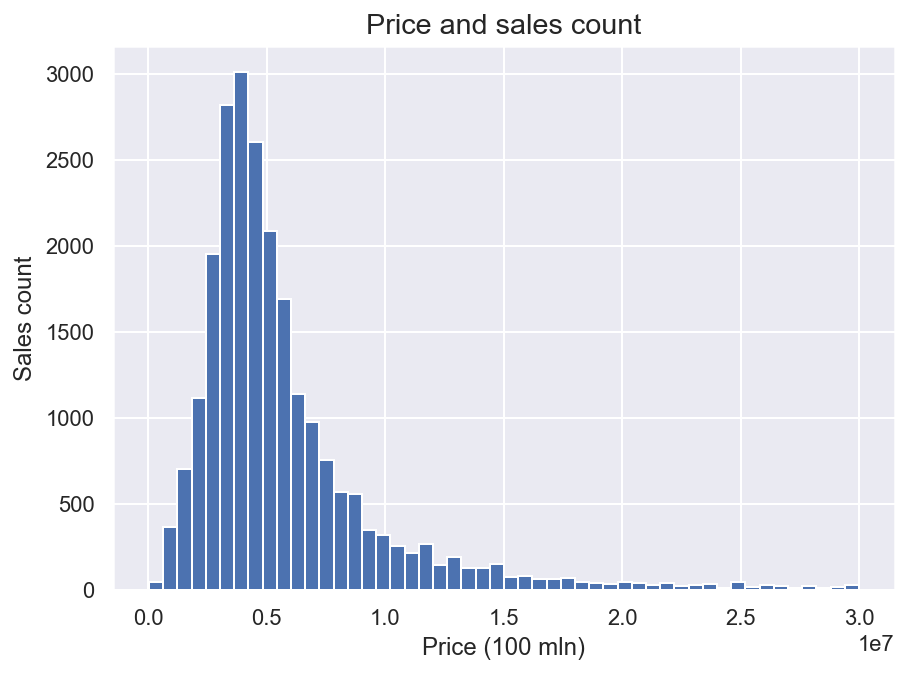

In [328]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(20000, 30000000), x='last_price', data=df);
plt.title('Price and sales count', size='large');
plt.ylabel('Sales count');
plt.xlabel('Price (100 mln)', size= 'medium');


In [329]:
df.last_price.describe()

count        23,698.00
mean      6,541,656.95
std      10,887,230.24
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [330]:
df = df.drop(df[df['last_price'] >= df['last_price'].quantile(.999)].index)

In [331]:
df.total_area.describe()

count   23,674.00
mean        60.03
std         33.81
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        590.00
Name: total_area, dtype: float64

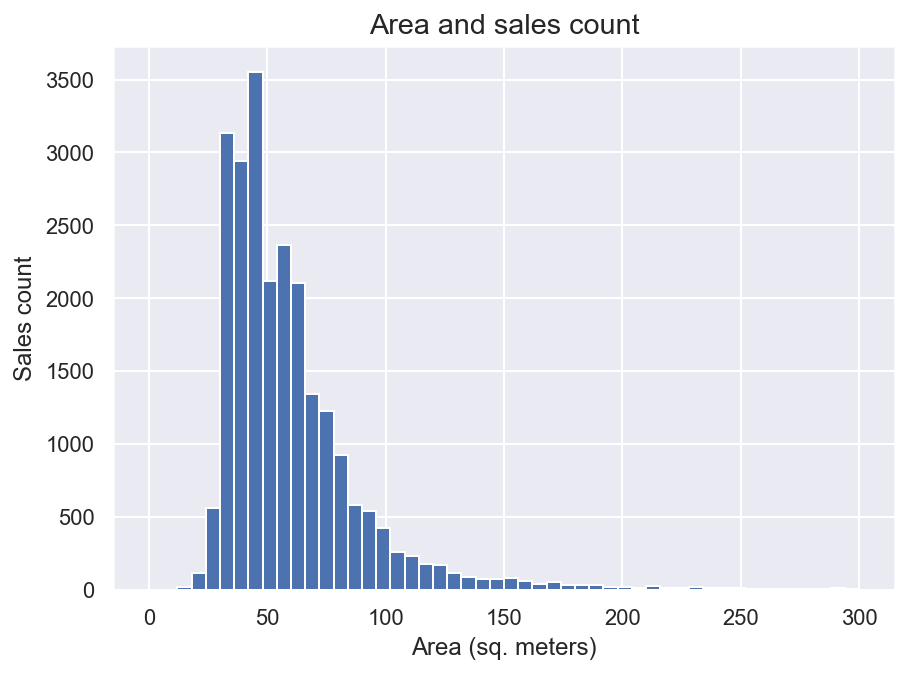

In [332]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(0, 300), x='total_area', data=df);
plt.title('Area and sales count', size='large');
plt.ylabel('Sales count');
plt.xlabel('Area (sq. meters)', size= 'medium');


The largest number of apartments sold had an area between 30 and 60 square meters. 

The histogram is asymmetric and quite corresponds to the reality of the situation. The most purchased apartments in the region are priced at 40-50 million. From zero and up to 40 million sales are less since real estate prices begin at a certain mark. The higher the price - the lower the number of sales

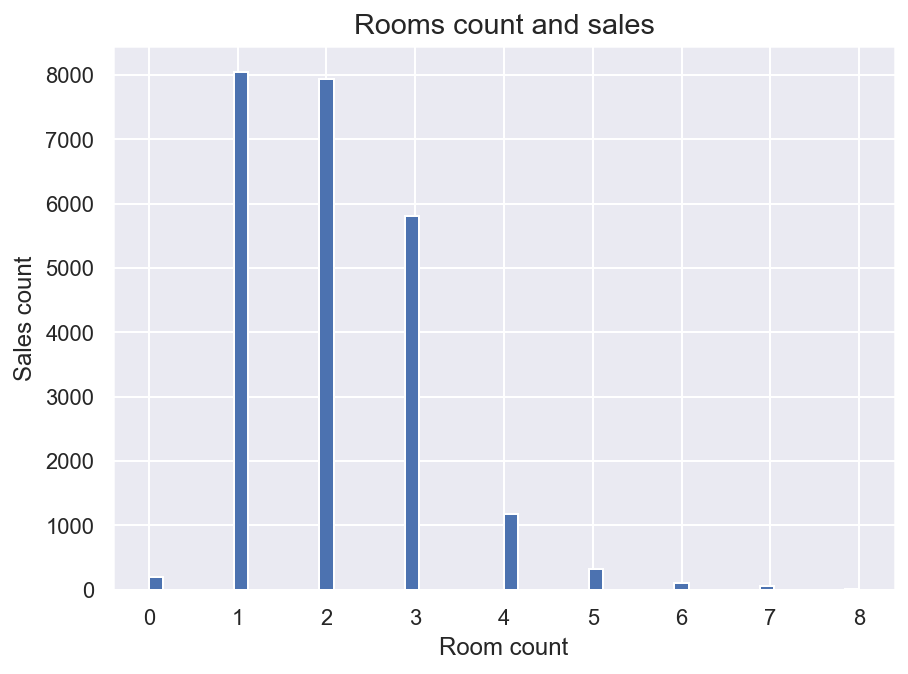

In [333]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(0, 8), x='rooms', data=df);
plt.title('Rooms count and sales', size='large');
plt.ylabel('Sales count');
plt.xlabel('Room count', size= 'medium');

The chart indicates that the most sold apartments were exactly one-room and two-room, the more rooms the higher the price - the less sales

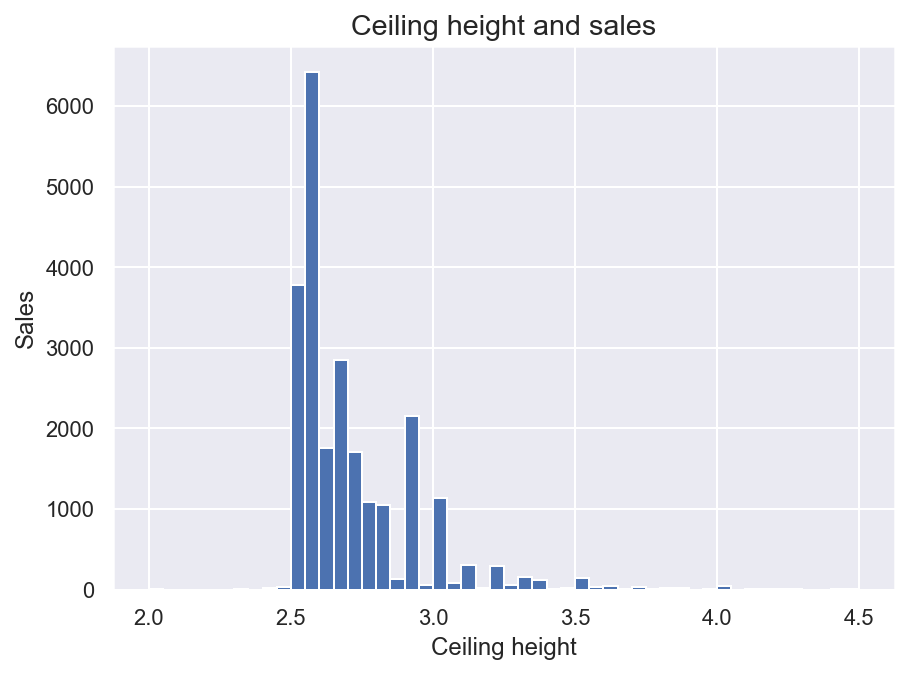

In [334]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(2, 4.5), x='ceiling_height', data=df,);
plt.title('Ceiling height and sales', size='large');
plt.ylabel('Sales');
plt.xlabel('Ceiling height', size= 'medium');

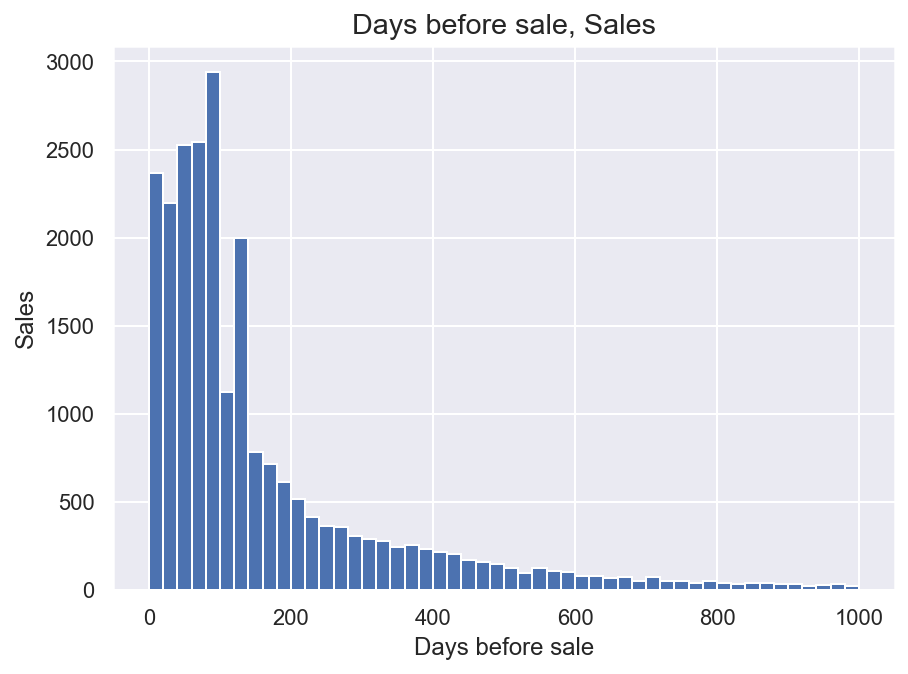

In [335]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(0, 1000), x='days_exposition', data=df,);
plt.title('Days before sale, Sales', size='large');
plt.ylabel('Sales');
plt.xlabel('Days before sale', size= 'medium');

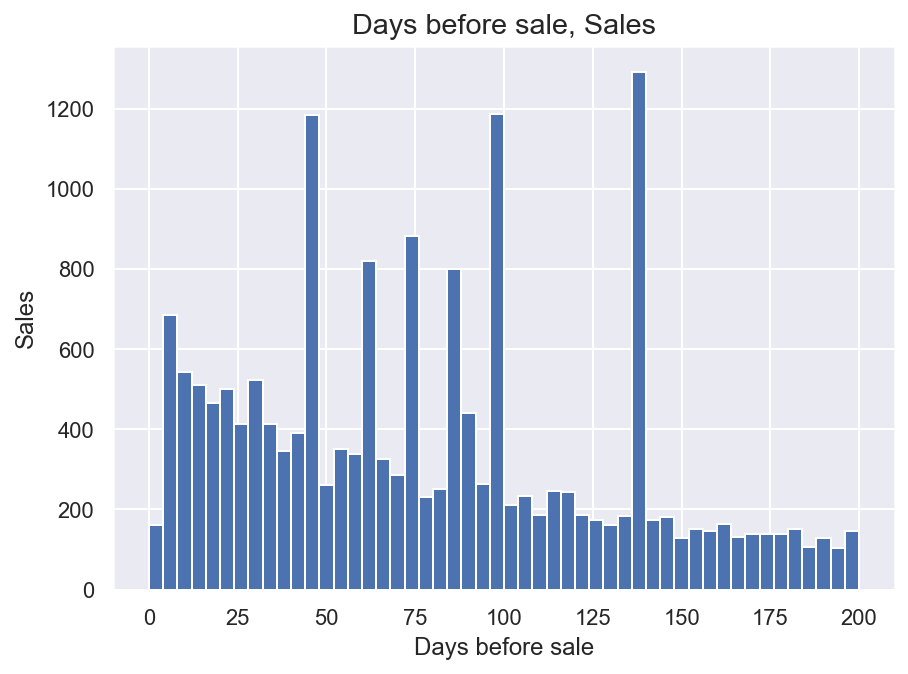

In [336]:
plt.figure(figsize=(7,5))
plt.hist(bins=50, range=(0, 200), x='days_exposition', data=df,);
plt.title('Days before sale, Sales', size='large');
plt.ylabel('Sales');
plt.xlabel('Days before sale', size= 'medium');

We see rather strange raises in the number of sales after a certain number of days. Maybe these are the intervals after which the announcement returns to the first page and maybe this is just a feature of the automated system

In [337]:
df.days_exposition.describe()

count   23,674.00
mean       170.62
std        206.20
min          1.00
25%         45.00
50%         96.00
75%        198.00
max      1,580.00
Name: days_exposition, dtype: float64

- Half of all apartments are sold in less than 96 days it can be considered that usually apartments are sold in about 3 months
- 25% of apartments sold in less than 45 days
- We can consider that if the apartment sold in 45 days or faster - lucky, the apartment sold quickly
- If it took more than 200 days to sell, the sale was delayed
- Average number of days waiting for sale exactly 170 but it is strongly affected by extreme values

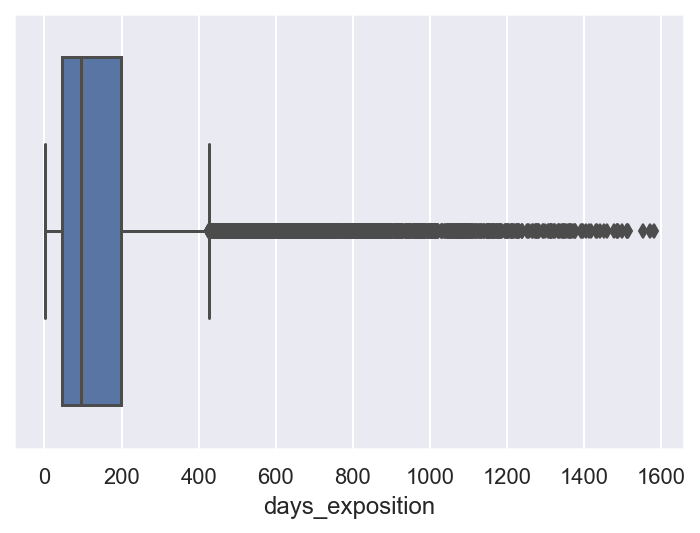

In [338]:
sns.boxplot(data=df, x='days_exposition');

We have a lot of data that looks like outliers but we cannot get rid of them as this is quite realistic data. They will not greatly interfere with our further analysis

In [339]:
df.square_meter_price.describe()

count    23,674.00
mean     98,810.61
std      44,450.88
min         111.83
25%      76,562.50
50%      94,997.75
75%     114,155.18
max     995,983.94
Name: square_meter_price, dtype: float64

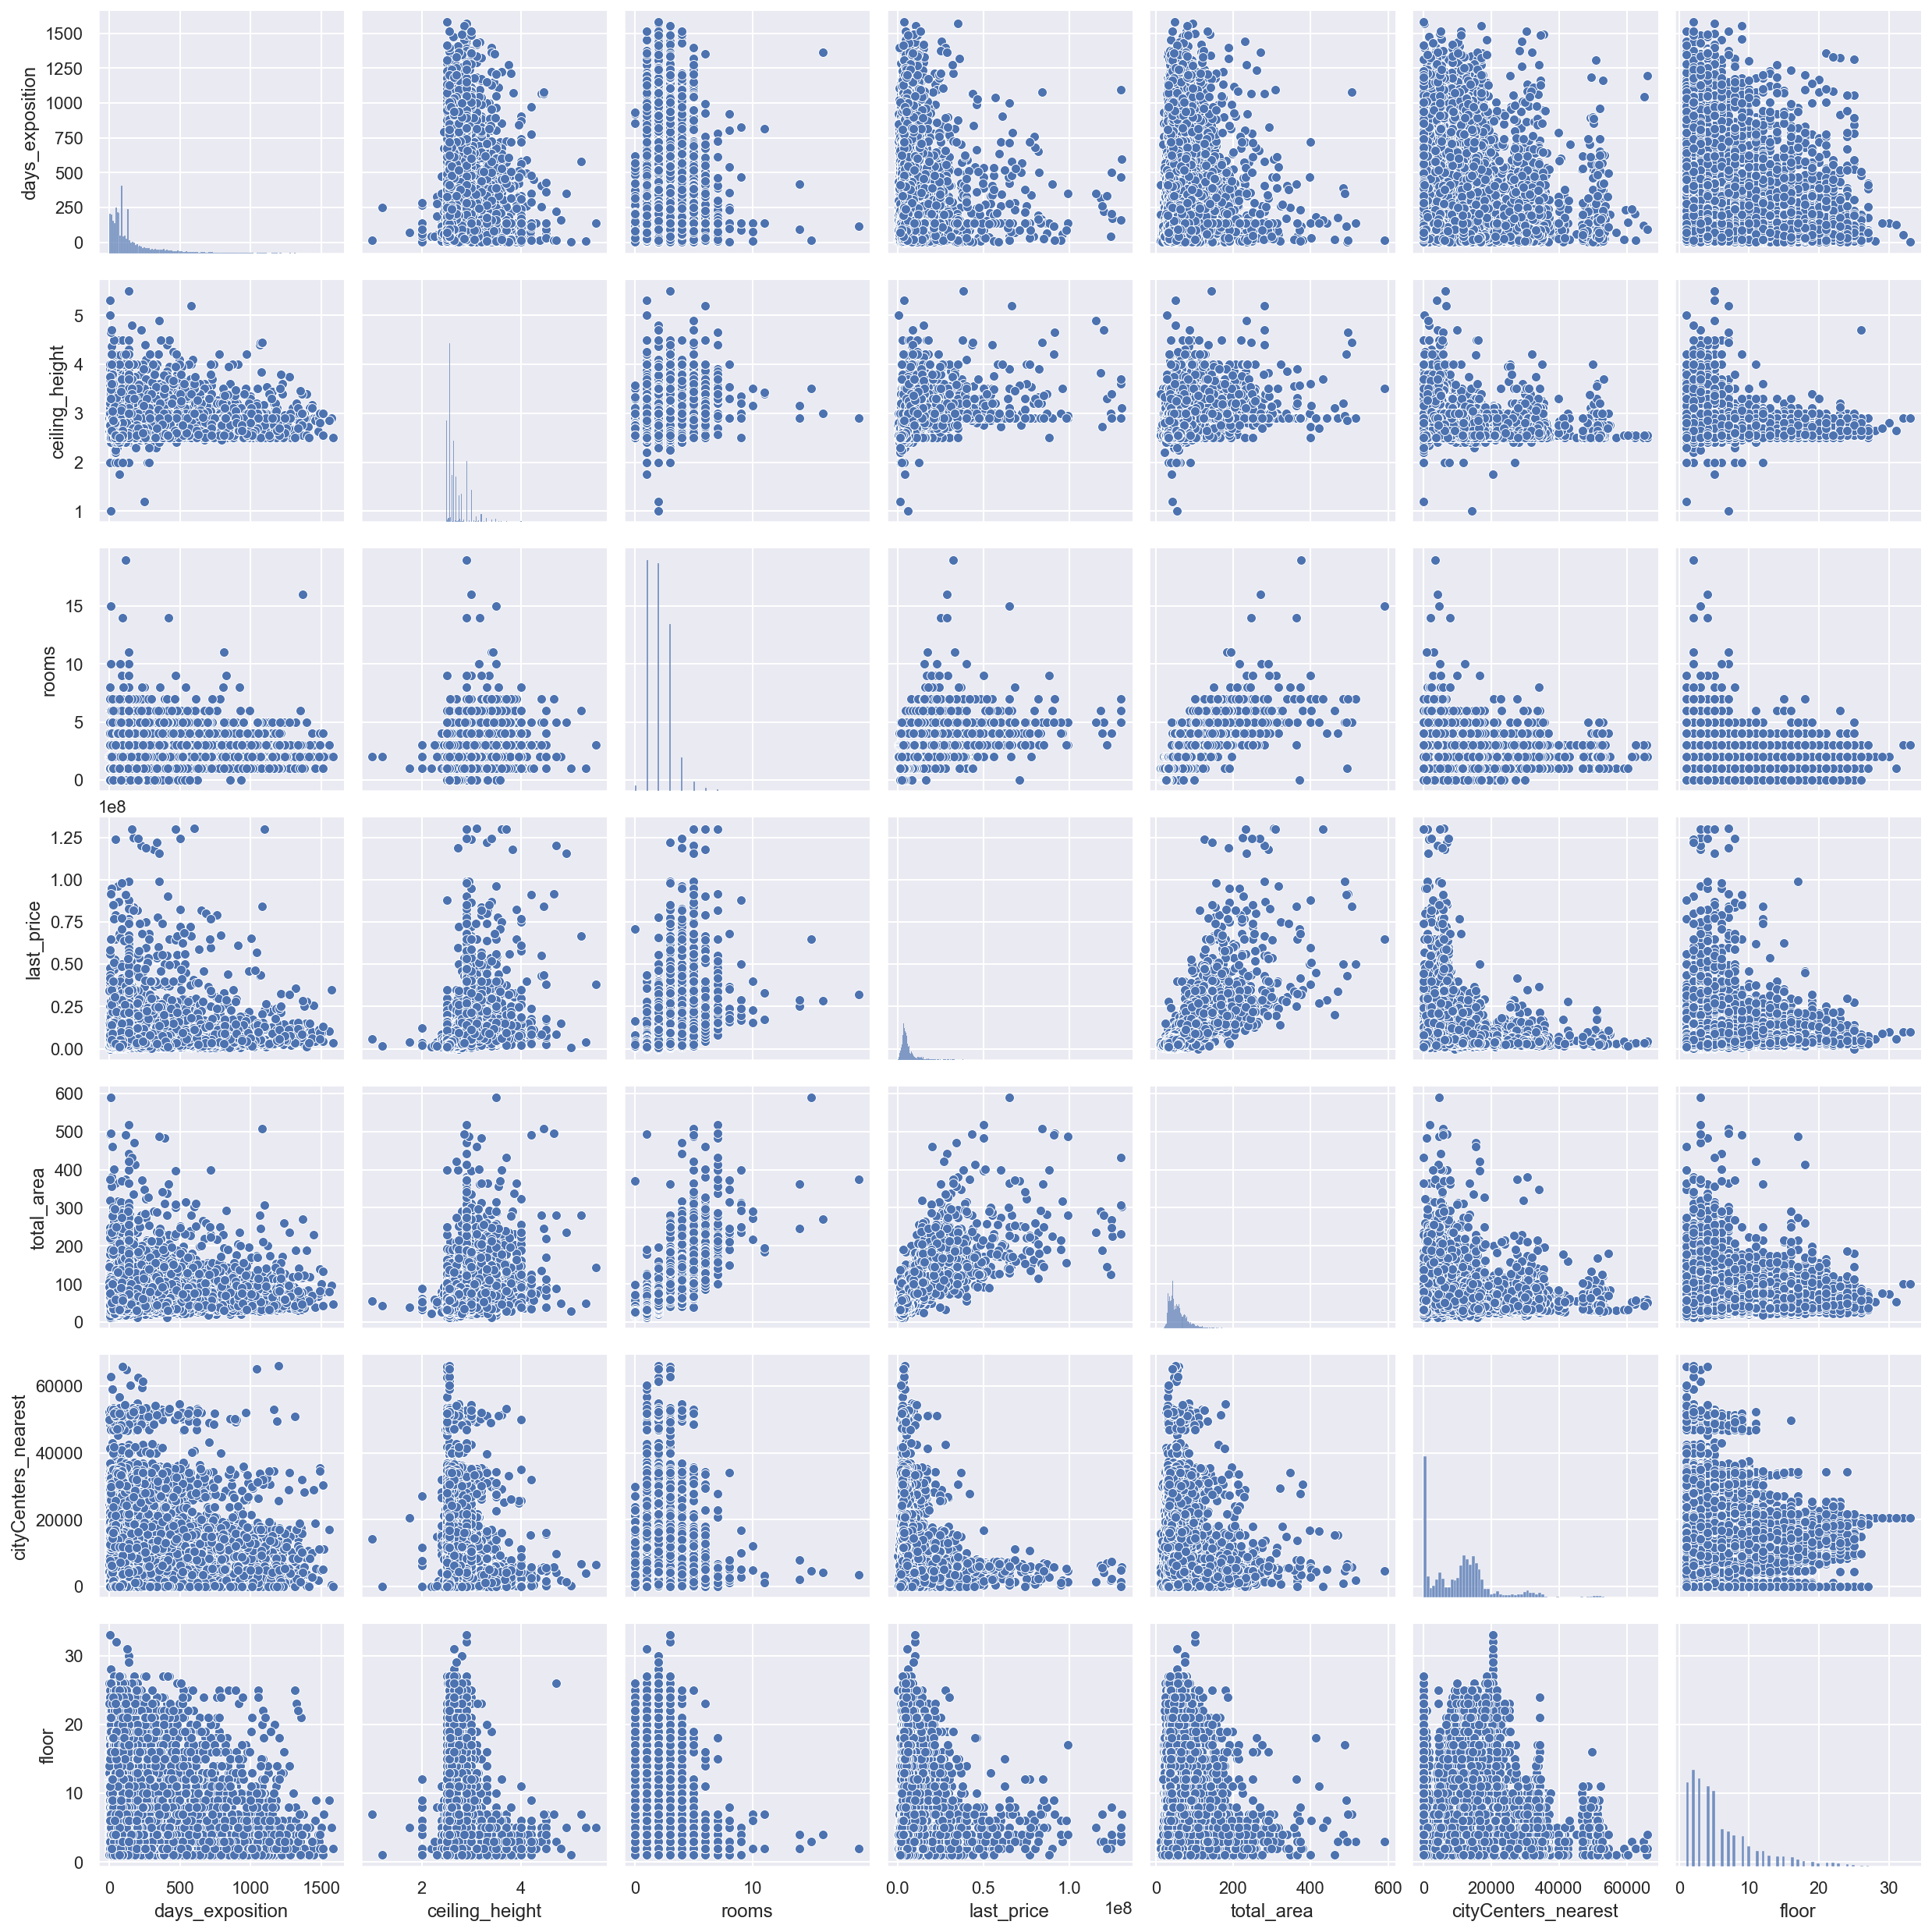

In [340]:
features = ['days_exposition', 'ceiling_height', 'rooms', 'last_price', 'total_area', 'cityCenters_nearest', 'floor']
sns.pairplot(df[features]);

In [341]:
features_2 = ['floor_cat', 'weekday', 'last_price']

map_floor_cat = {
    'first': 0,
    'last': 1,
    'other': 2
}

df['floor_cat'] = df['floor_cat'].map(map_floor_cat)

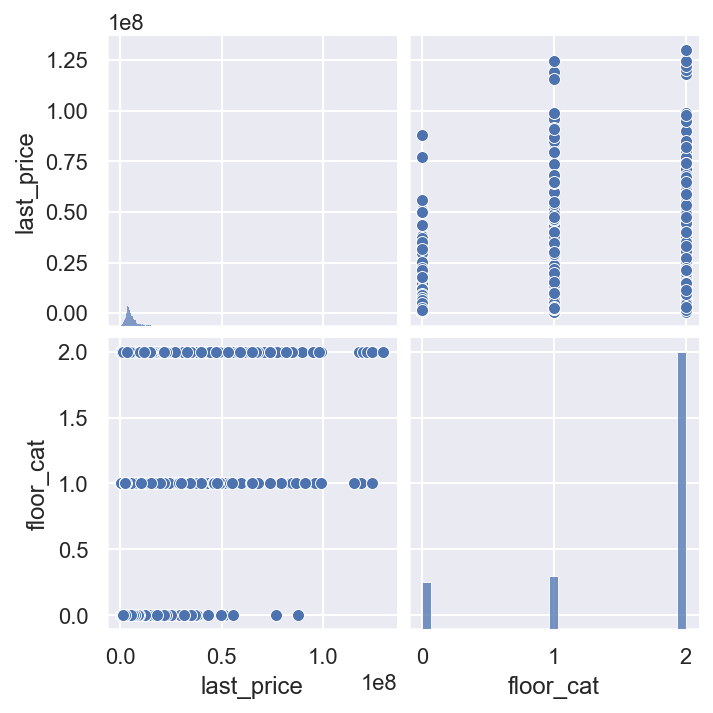

In [342]:
sns.pairplot(df[['last_price', 'floor_cat']]);

The following characteristics display the linear dependency:
- price and total area
- price and number of rooms
- price and height of ceilings

The graphs show the negative relationship between:

- the price and distance to the center - the more it is the cheaper the apartment.
- price and waiting time - the higher the price the faster the apartments buy.
- price and floor - the higher the price the lower the floor - > but at the same time the first and last floors are valued less than all others

 


In [343]:
table = df['locality'].value_counts().sort_values(ascending=False)

names = []
for index in table[:11].index:
    names.append(index)

df_popular = df[df['locality'].isin(names)]

In [344]:
df_popular.groupby('locality').agg({'last_price': ['mean','count'], 'square_meter_price': 'mean'}).sort_values(('last_price', 'mean'), ascending=False)

last_price        square_meter_price
                        mean  count               mean
locality                                              
Санкт-Петербург 7,722,122.35  15745         113,890.82
Пушкин          6,469,035.95    369         103,125.82
Парголово       4,488,074.80    327          90,175.91
Петергоф        4,423,840.80    201          84,757.56
Кудрово         4,358,688.05    472          95,324.93
Шушары          4,108,081.82    440          78,677.36
Колпино         3,964,021.44    338          75,424.58
Всеволожск      3,789,067.75    398          68,654.47
Мурино          3,678,462.20    590          86,087.51
Гатчина         3,488,336.68    307          68,746.15
Выборг          3,250,983.12    237          58,141.91

The smallest prices in Vyborg, and the most expensive, in St. Petersburg. Pushkin and the village of Pargolovo in second and third place

### 7.1 Analysis of apartments in the center of St.Petersbourgh

In [345]:
col1 = df[df['locality'] == 'Санкт-Петербург']['cityCenters_nearest']
col2 = df[df['locality'] == 'Санкт-Петербург']['last_price']

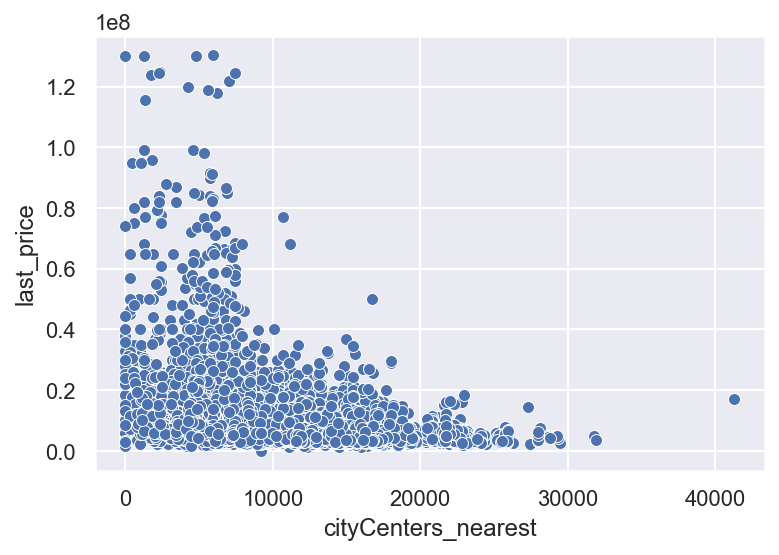

In [346]:
sns.scatterplot(col1, col2);

We see that in the zone of 8-9 kilometers from the city center, prices are falling sharply.

In [347]:
df['center_distance_km'] = (df['cityCenters_nearest'] / 1000).astype('int')

In [348]:
df_spb = df[(df['center_distance_km'] < 10 )& (df['locality_name'] == 'Санкт-Петербург')]

In [349]:
df_spb.groupby('center_distance_km').agg({'last_price': ['mean','max'],
                                         'total_area': ['mean', 'max']})

last_price                total_area       
                            mean            max       mean    max
center_distance_km                                               
0                  17,577,699.29 130,000,000.00      98.64 483.90
1                  16,420,441.66 130,000,000.00     102.51 517.00
2                  14,429,027.15 125,000,000.00      97.40 400.00
3                  11,171,526.37  87,000,000.00      89.78 374.60
4                  13,018,362.23 130,000,000.00      94.29 590.00
5                  13,782,771.13 130,278,280.00      91.79 507.00
6                  13,606,581.00 118,000,000.00      81.58 494.10
7                  11,490,501.76 124,480,000.00      74.58 373.10
8                   8,418,168.99  46,000,000.00      67.61 260.00
9                   6,430,256.64  39,900,000.00      57.70 309.70

As th graph shows the prices fall sharply at a distance of 8 kilometers from the center of St. Petersburg. It is also noticeable that apartments in the center are larger in size than those that are further away

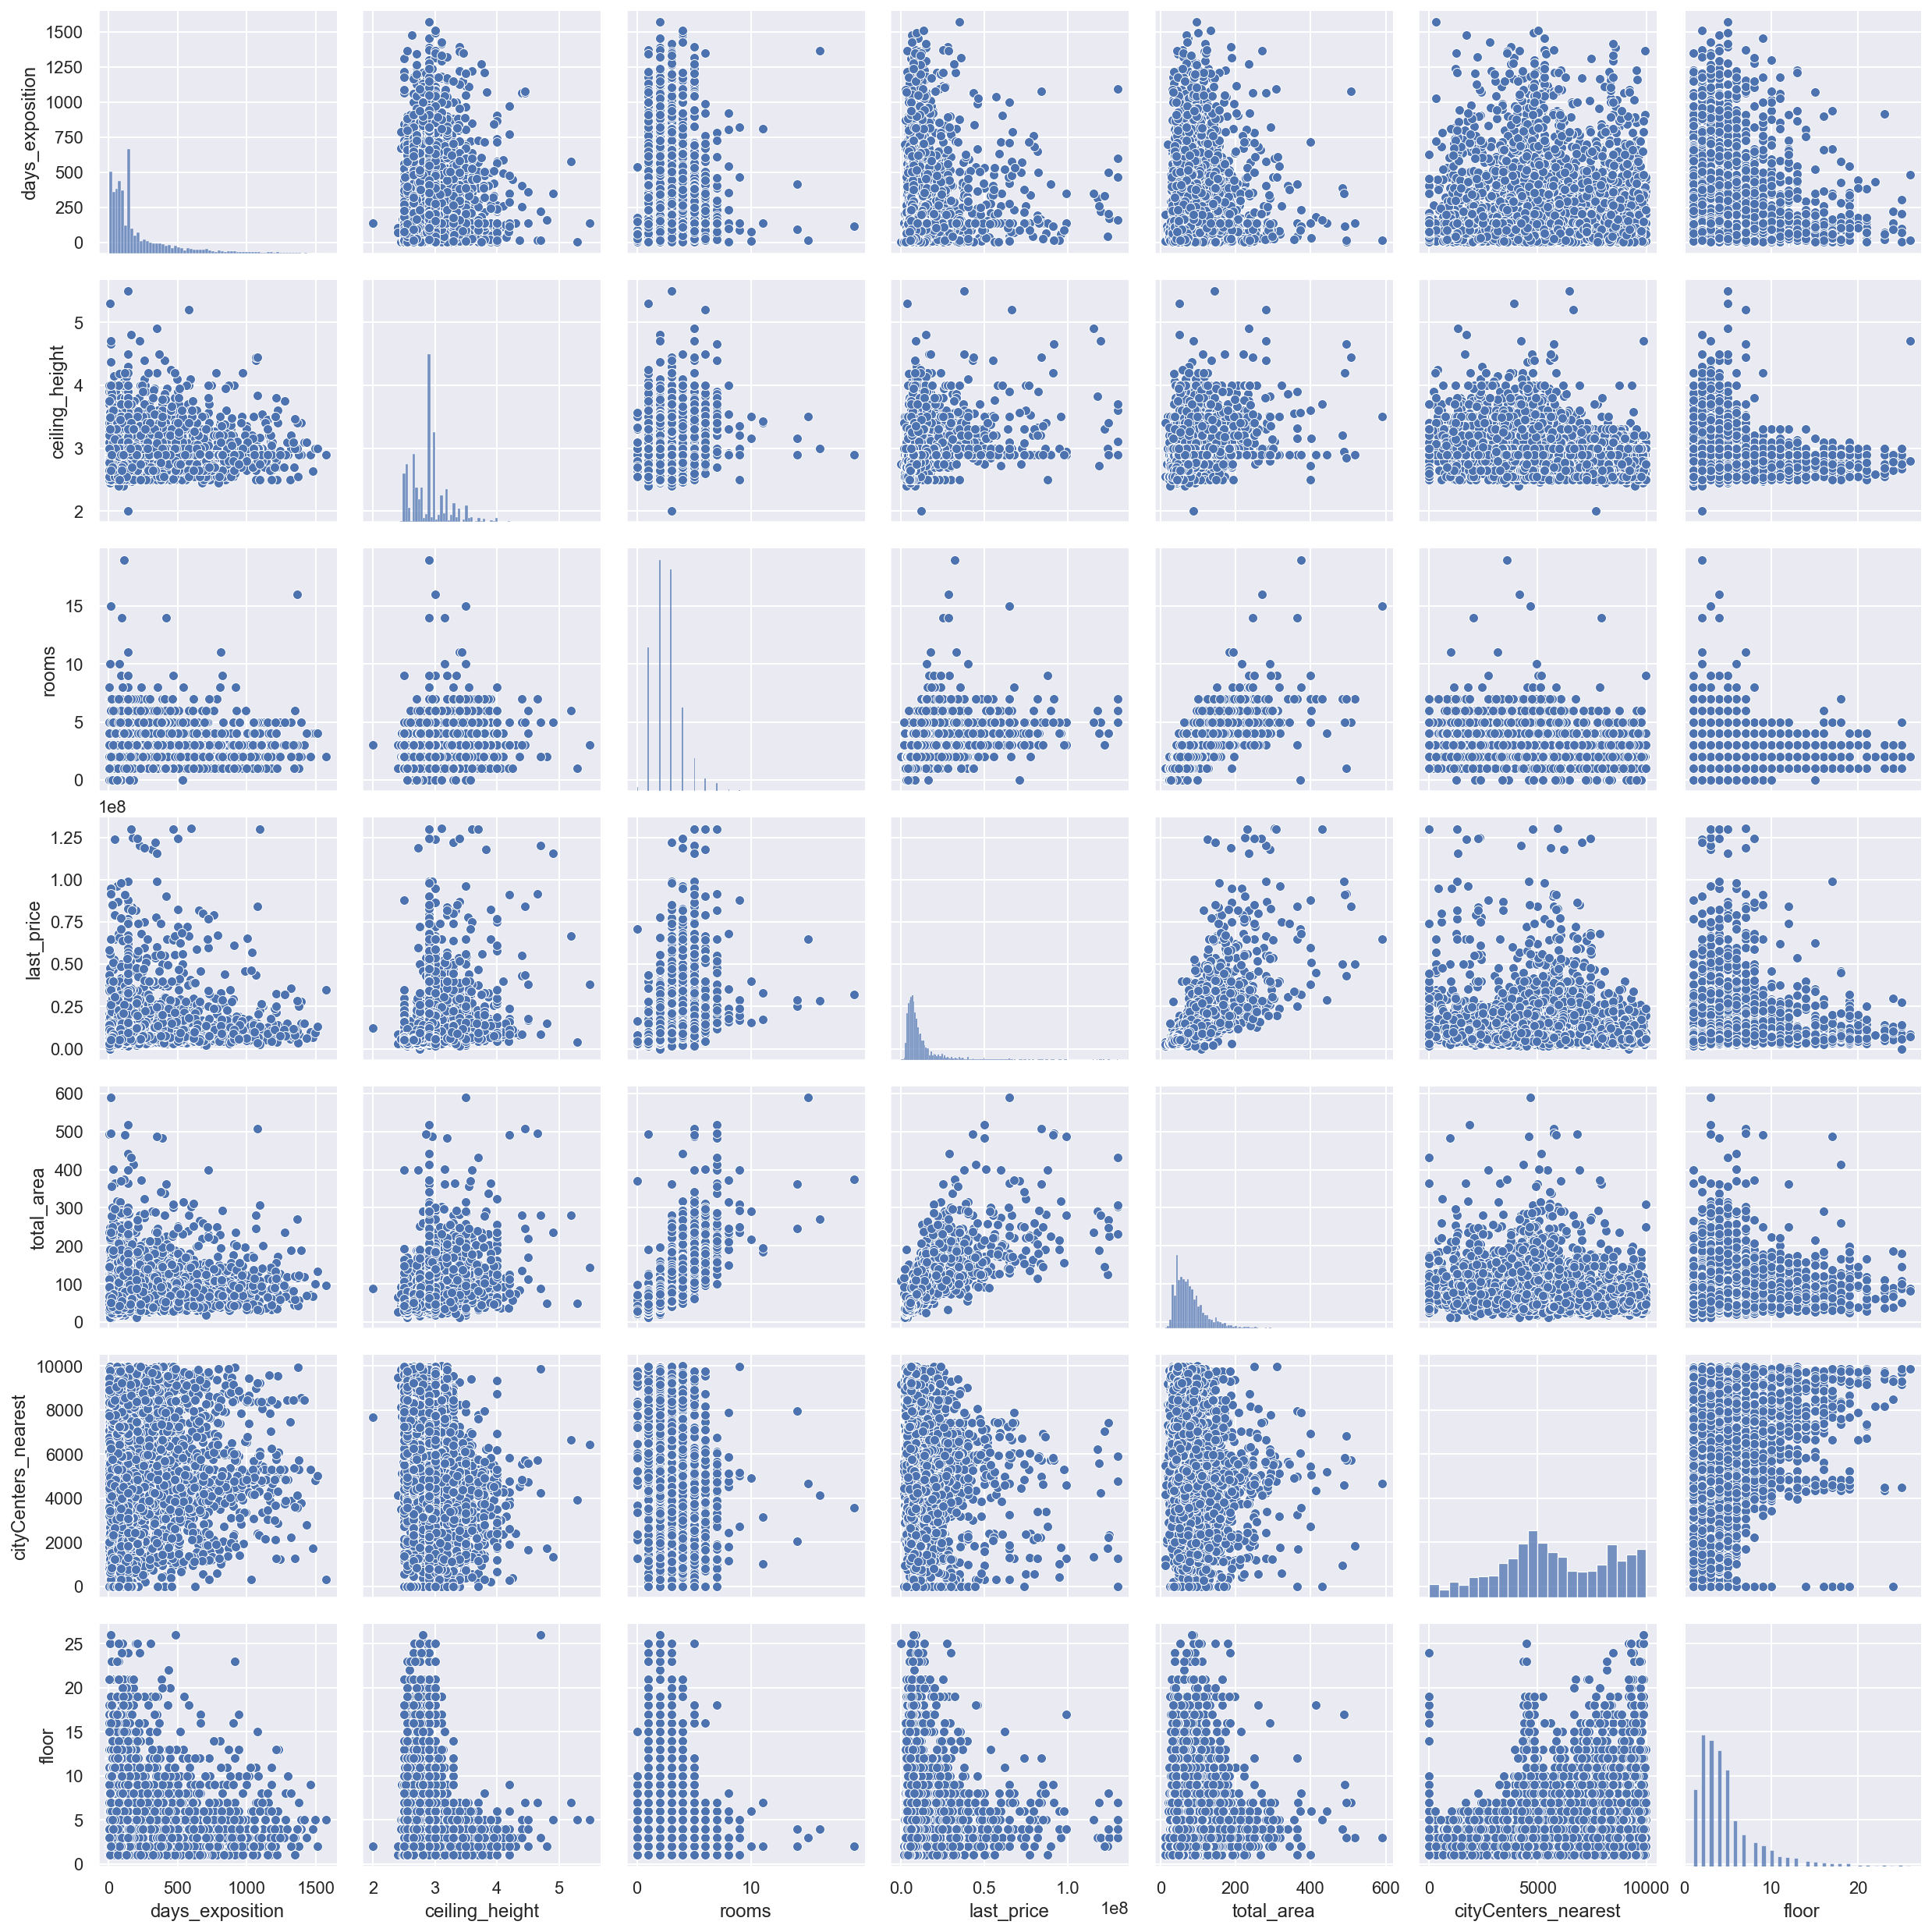

In [350]:
sns.pairplot(df_spb[features]);

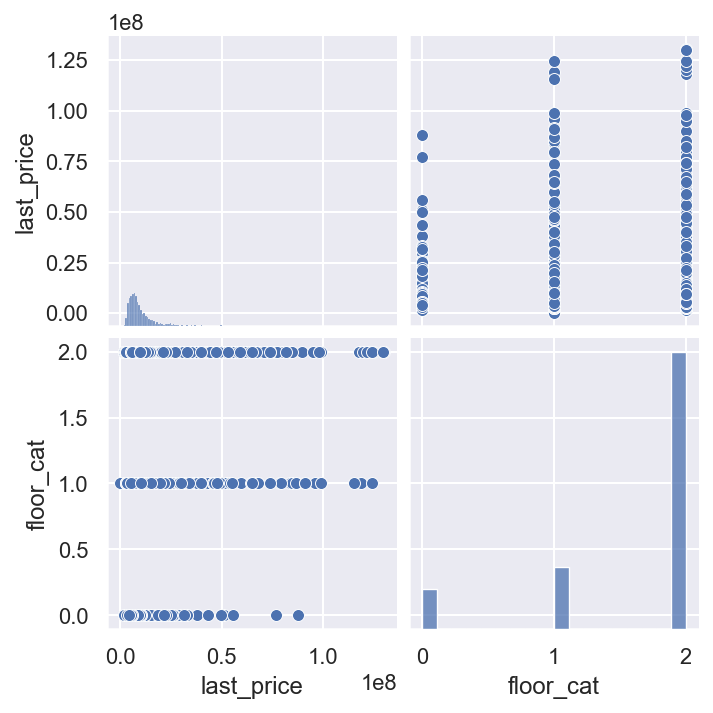

In [351]:
sns.pairplot(df_spb[['last_price', 'floor_cat']]);

As with the data of the entire table, the following characteristics are visible in the SPB:
- price and total area
- price and number of rooms
- prices and height of ceilings

And the negative relationship between:

- the price and distance to the center - the more it is the cheaper the apartment.
- price and waiting time - the higher the price the faster the apartments buy.
- price and floor - the higher the price the lower the floor

We see on the chart that apartments where floors of the "other" category cost more. People are ready to pay more for an apartment that is not on the first and not on the top floor.

### Подсчитаем взаимозависимость и сверим цифры с нашими заключениями

In [354]:
correlated_columns = [   
"total_area",
"rooms",
"ceiling_height",
"floors_total",
"floor",
"balcony",
"cityCenters_nearest",
"days_exposition"]
for i in correlated_columns:
    print(f'Correlation of {i} with price')
    display(df[[i, 'last_price']].corr())

Correlation of total_area with price


total_area  last_price
total_area        1.00        0.75
last_price        0.75        1.00

Correlation of rooms with price


rooms  last_price
rooms        1.00        0.46
last_price   0.46        1.00

Correlation of ceiling_height with price


ceiling_height  last_price
ceiling_height            1.00        0.49
last_price                0.49        1.00

Correlation of floors_total with price


floors_total  last_price
floors_total          1.00        0.00
last_price            0.00        1.00

Correlation of floor with price


floor  last_price
floor        1.00        0.03
last_price   0.03        1.00

Correlation of balcony with price


balcony  last_price
balcony        1.00        0.01
last_price     0.01        1.00

Correlation of cityCenters_nearest with price


cityCenters_nearest  last_price
cityCenters_nearest                 1.00       -0.06
last_price                         -0.06        1.00

Correlation of days_exposition with price


days_exposition  last_price
days_exposition             1.00        0.10
last_price                  0.10        1.00

The tables show that the price, as we have already determined, depends mainly on:
- Apartment areas
- Number of rooms (which also depends on the area of the square)
- Ceiling heights

### 7.2 Correlation of the price and the time before selling

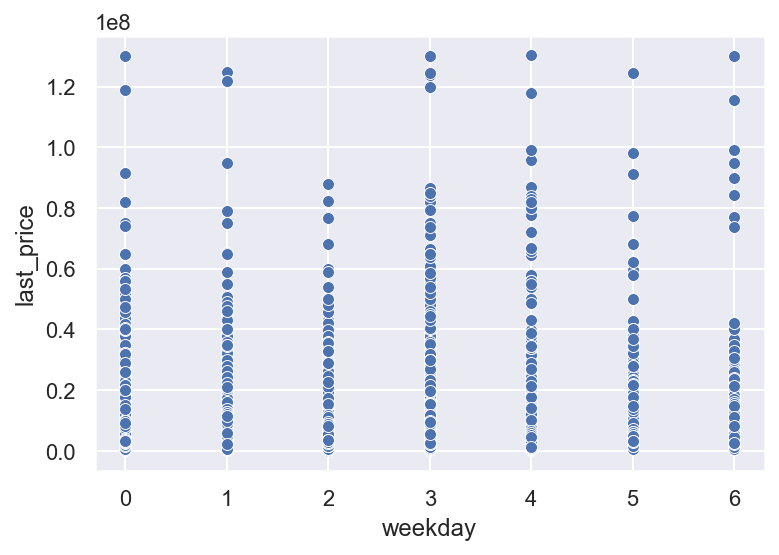

In [120]:
sns.scatterplot(x='weekday', y='last_price', data=df);

The chart indicates that there are fewer announcements for the weekend and most in the middle of the week. Check on numbers if so

In [121]:
df.groupby('weekday').agg({'last_price':['mean', 'count', 'median']})

last_price                   
                mean count       median
weekday                                
0       6,322,330.84  3608 4,650,000.00
1       6,227,288.83  4179 4,709,190.00
2       6,234,321.78  3967 4,700,000.00
3       6,643,075.84  4293 4,650,000.00
4       6,224,137.24  3996 4,580,000.00
5       6,191,921.55  1932 4,550,000.00
6       6,246,180.30  1699 4,550,000.00

The data in the table confirms that the most announcements appear on Tuesday and Thursday, slightly less on Monday, Wednesday and Friday. There are half as many announcements on the weekend. Announcements issued on different days do not affect the price

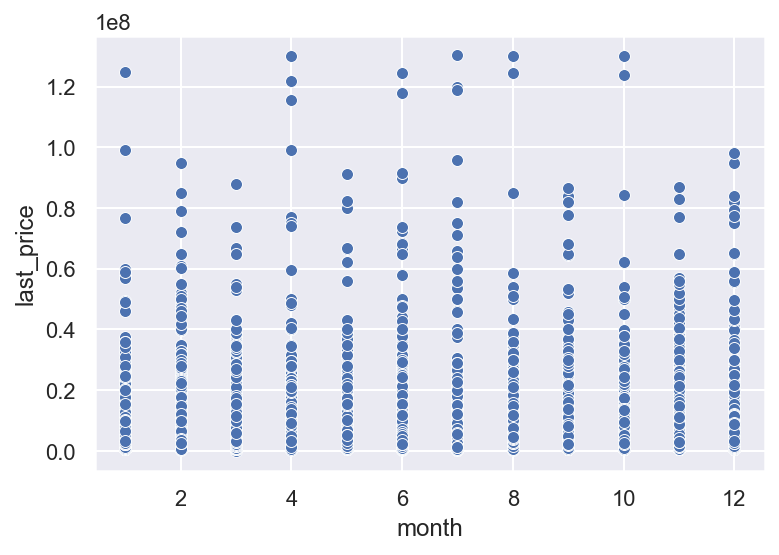

In [355]:
sns.scatterplot(x='month', y='last_price', data=df);

In [356]:
df.groupby('month').agg({'last_price':['mean', 'count', 'median']})

last_price                   
              mean count       median
month                                
1     6,456,842.25  1498 4,600,000.00
2     6,270,106.25  2638 4,650,000.00
3     6,071,752.70  2583 4,650,000.00
4     6,282,137.81  2374 4,800,000.00
5     6,323,863.61  1272 4,500,000.00
6     6,310,269.40  1760 4,400,000.00
7     6,570,618.09  1694 4,650,000.00
8     6,262,089.68  1743 4,570,000.00
9     6,381,839.45  1978 4,700,000.00
10    6,097,351.93  2125 4,550,000.00
11    6,396,578.50  2370 4,700,000.00
12    6,580,995.29  1639 4,700,000.00

In [357]:
df.head()

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00           2019-03-07      3   
1             7  3,350,000.00       40.40           2018-12-04      1   
2            10  5,196,000.00       56.00           2015-08-20      2   
3             0 64,900,000.00      159.00           2015-07-24      3   
4             2 10,000,000.00      100.00           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0            2.70            16        51.00      8   False  ...   
1            2.55            11        18.60      1   False  ...   
2            2.65             5        34.30      4   False  ...   
3            2.90            14         0.57      9   False  ...   
4            3.03            14        32.00     13   False  ...   

   total_living_coeff  size_category         locality square_meter_price  \
0                0.47             XL  Санкт-Петербург         120,370.37   
1                0.46         medium           Шушары          82,920.79   
2                0.61          large  Санкт-Петербург          92,785.71   
3                0.00             XL  Санкт-Петербург         408,176.10   
4                0.32             XL  Санкт-Петербург         100,000.00   

   kitchen_total_coeff  year  month  weekday  floor_cat  center_distance_km  
0                 0.23  2019      3        3          2                  16  
1                 0.27  2018     12        1          0                  18  
2                 0.15  2015      8        3          2                  13  
3                 0.08  2015      7        4          2                   6  
4                 0.41  2018      6        1          2                   8  

[5 rows x 32 columns]

## Final conclusion

Preprocessing:

- The missing have been processed
- some outliers have been changed, others have been removed
- announcement placement date converted to required format
- data with city name was processed

Some data may still be considered as being 'outliers' by looking at the histograms, however, they correspond to the real situation in the real estate market. There are houses/apartments very different from each other in price and area

Added to dataset:

- cost of square meter
- day, month, year
- category of housing depending on the floor
- ratio of living and kitchen space to total
- distance to the center in km.
- city/village name
- category of housing depending on size


Most often found in ads:

- price about 4 million. (rub)
- area 40-50 m2
- 2-4 rooms with a ceiling height of 2.5 or 2.6 meters

Factors on which the price of housing depends:

- area
- number of rooms
- floor (on the first and last apartment cheaper)
- distance to center